In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

In [2]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
yf.pdr_override()

# Obtaining the stock data.

In [3]:
tech_list = ['AAPL', 'ADBE', 'AMZN', 'CSCO', 'DELL', 'GOOG', 'HPQ', 'IBM', 'INTL', 'INTU', 'LYFT', 'META', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'PYPL', 'QCOM', 'SONY', 'TSLA', 'UBER']

end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

for ticker in tech_list:
    globals() [ticker] = yf.download(ticker, start, end)

company_list = [AAPL, ADBE, AMZN, CSCO, DELL, GOOG, HPQ, IBM, INTL, INTU, LYFT, META, MSFT, NFLX, NVDA, ORCL, PYPL, QCOM, SONY, TSLA, UBER]
company_name = ['APPLE', 'ADOBE', 'AMAZON', 'CISCO', 'DELL', 'GOOGLE', 'HP', 'IBM', 'INTEL', 'INTUIT', 'LYFT', 'META', 'MICROSOFT', 'NETFLIX', 'NVIDIA', 'ORACLE', 'PAYPAL', 'QUALCOMM', 'SONY', 'TESLA', 'UBER']

for comp_ticker, comp_name in zip(company_list, company_name):
    comp_ticker["Company Name"] = comp_name

df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [4]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-03  138.210007  143.070007  137.690002  142.449997  141.609909   
2022-10-04  145.029999  146.220001  144.259995  146.100006  145.238403   
2022-10-05  144.070007  147.380005  143.009995  146.399994  145.536606   
2022-10-06  145.809998  147.539993  145.220001  145.429993  144.572342   
2022-10-07  142.539993  143.100006  139.449997  140.089996  139.263824   
...                ...         ...         ...         ...         ...   
2023-09-26   44.500000   45.389000   44.044998   44.270000   44.270000   
2023-09-27   44.509998   45.473000   44.439999   45.139999   45.139999   
2023-09-28   44.919998   46.580002   44.919998   46.139999   46.139999   
2023-09-29   46.750000   46.919998   45.849998   45.990002   45.990002   
2023-10-02   45.570000   46.290001   45.101601   45.680000   45.680000   

               Volume Company Name  
Date                                
2022-10-03  114311700        APPLE  
2022-10-04   87830100        APPLE  
2022-10-05   79471000        APPLE  
2022-10-06   68402200        APPLE  
2022-10-07   85925600        APPLE  
...               ...          ...  
2023-09-26   11283600         UBER  
2023-09-27   16835100         UBER  
2023-09-28   22199200         UBER  
2023-09-29   14237200         UBER  
2023-10-02   14793717         UBER  

[5228 rows x 7 columns]

# Data Analysis

#### a) Closing price analysis.

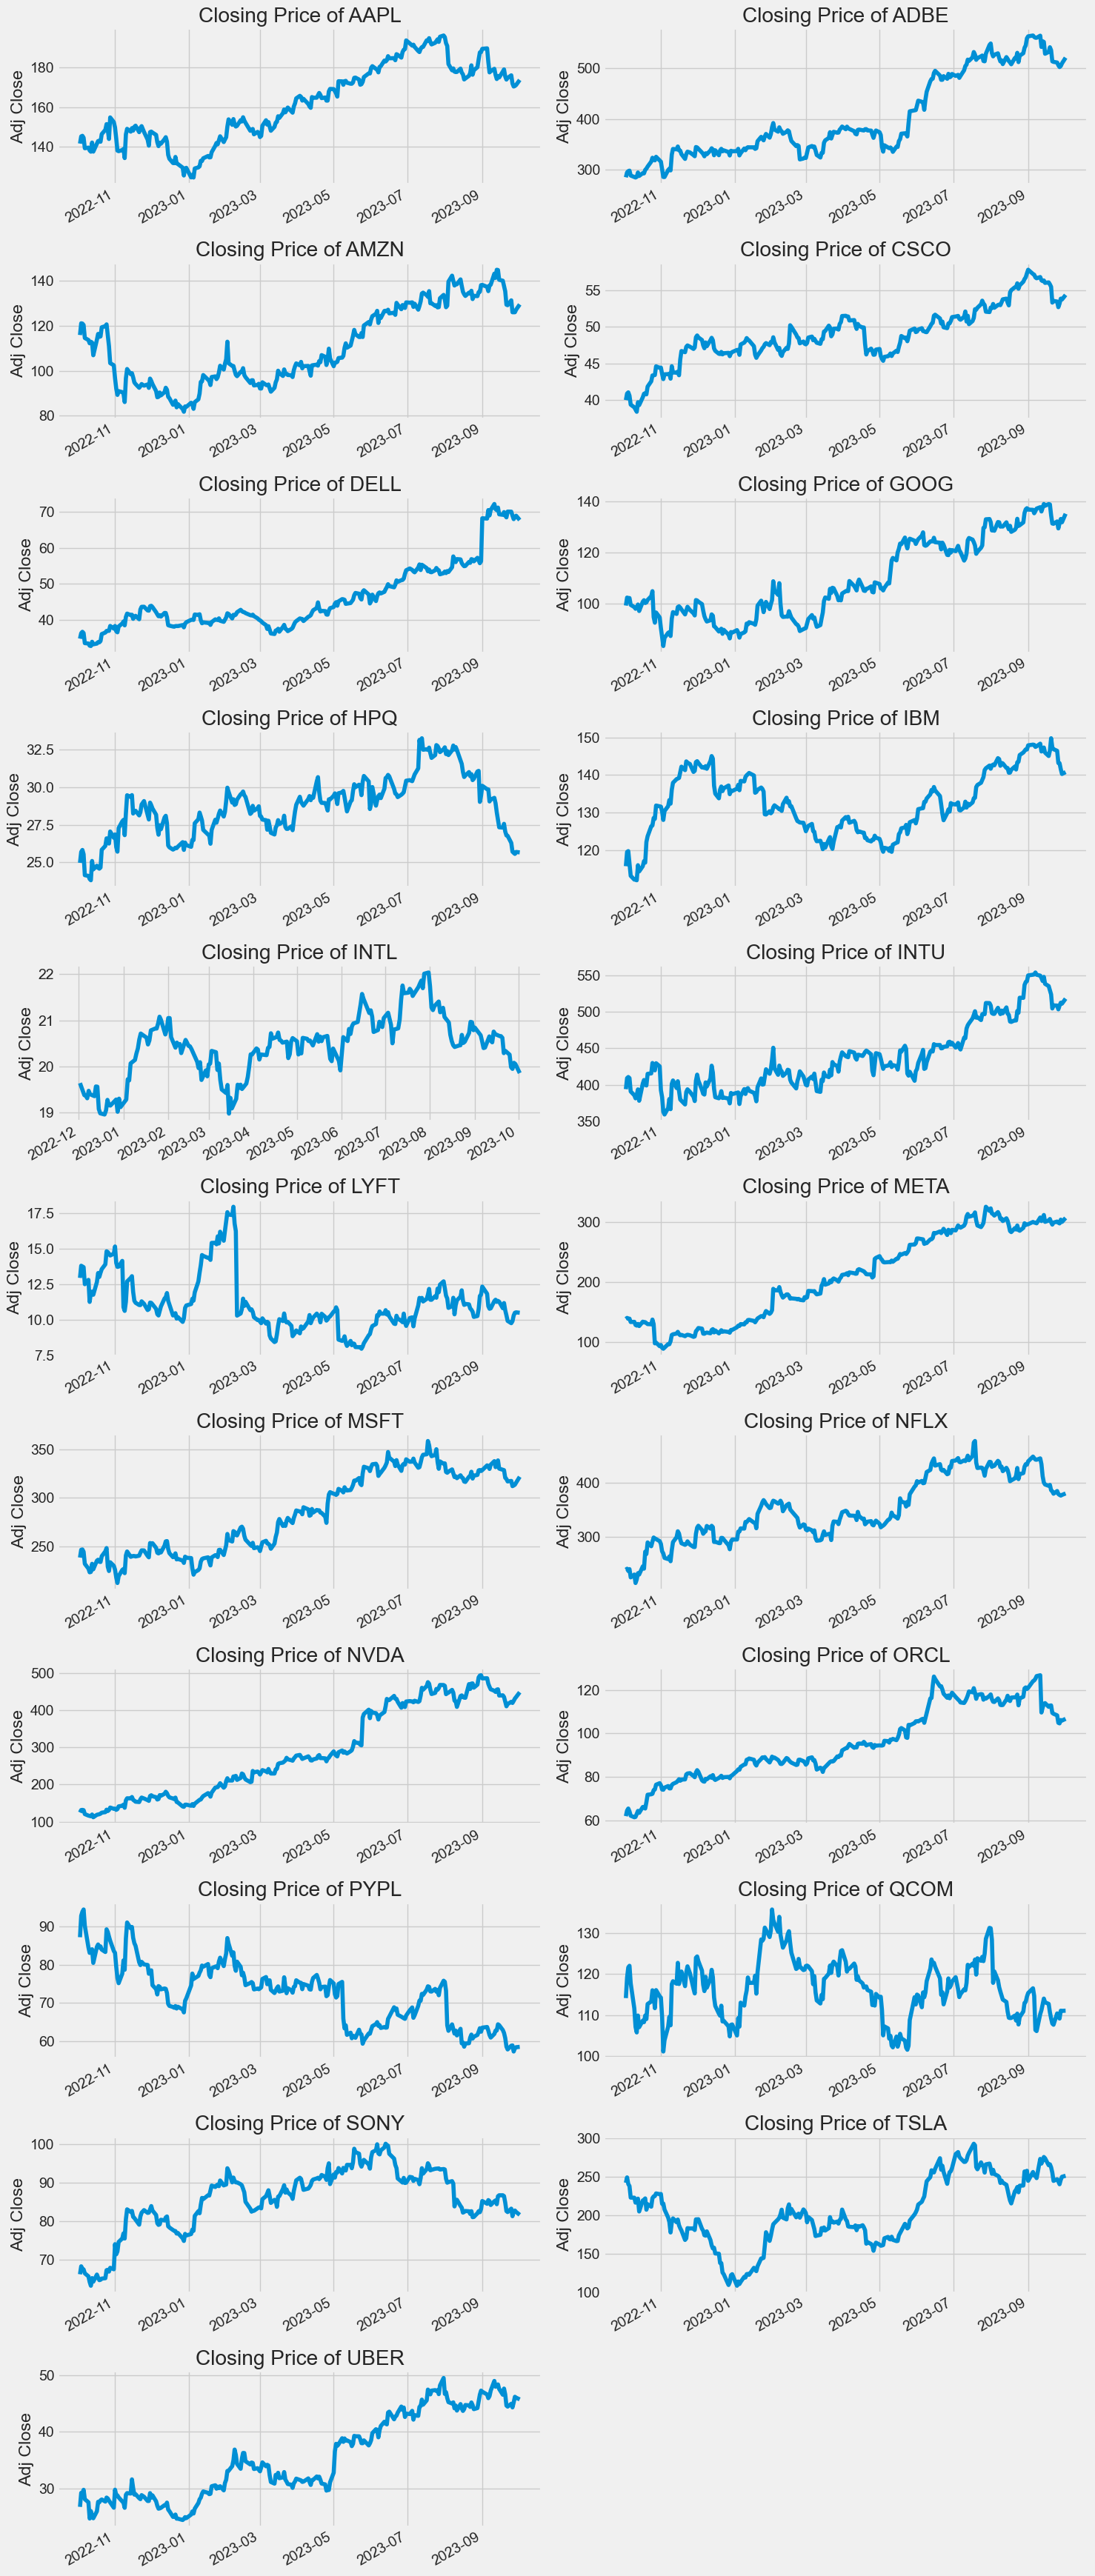

In [5]:
plt.figure(figsize=(15, 35))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(11, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

#### b) Volume of sales analysis. 

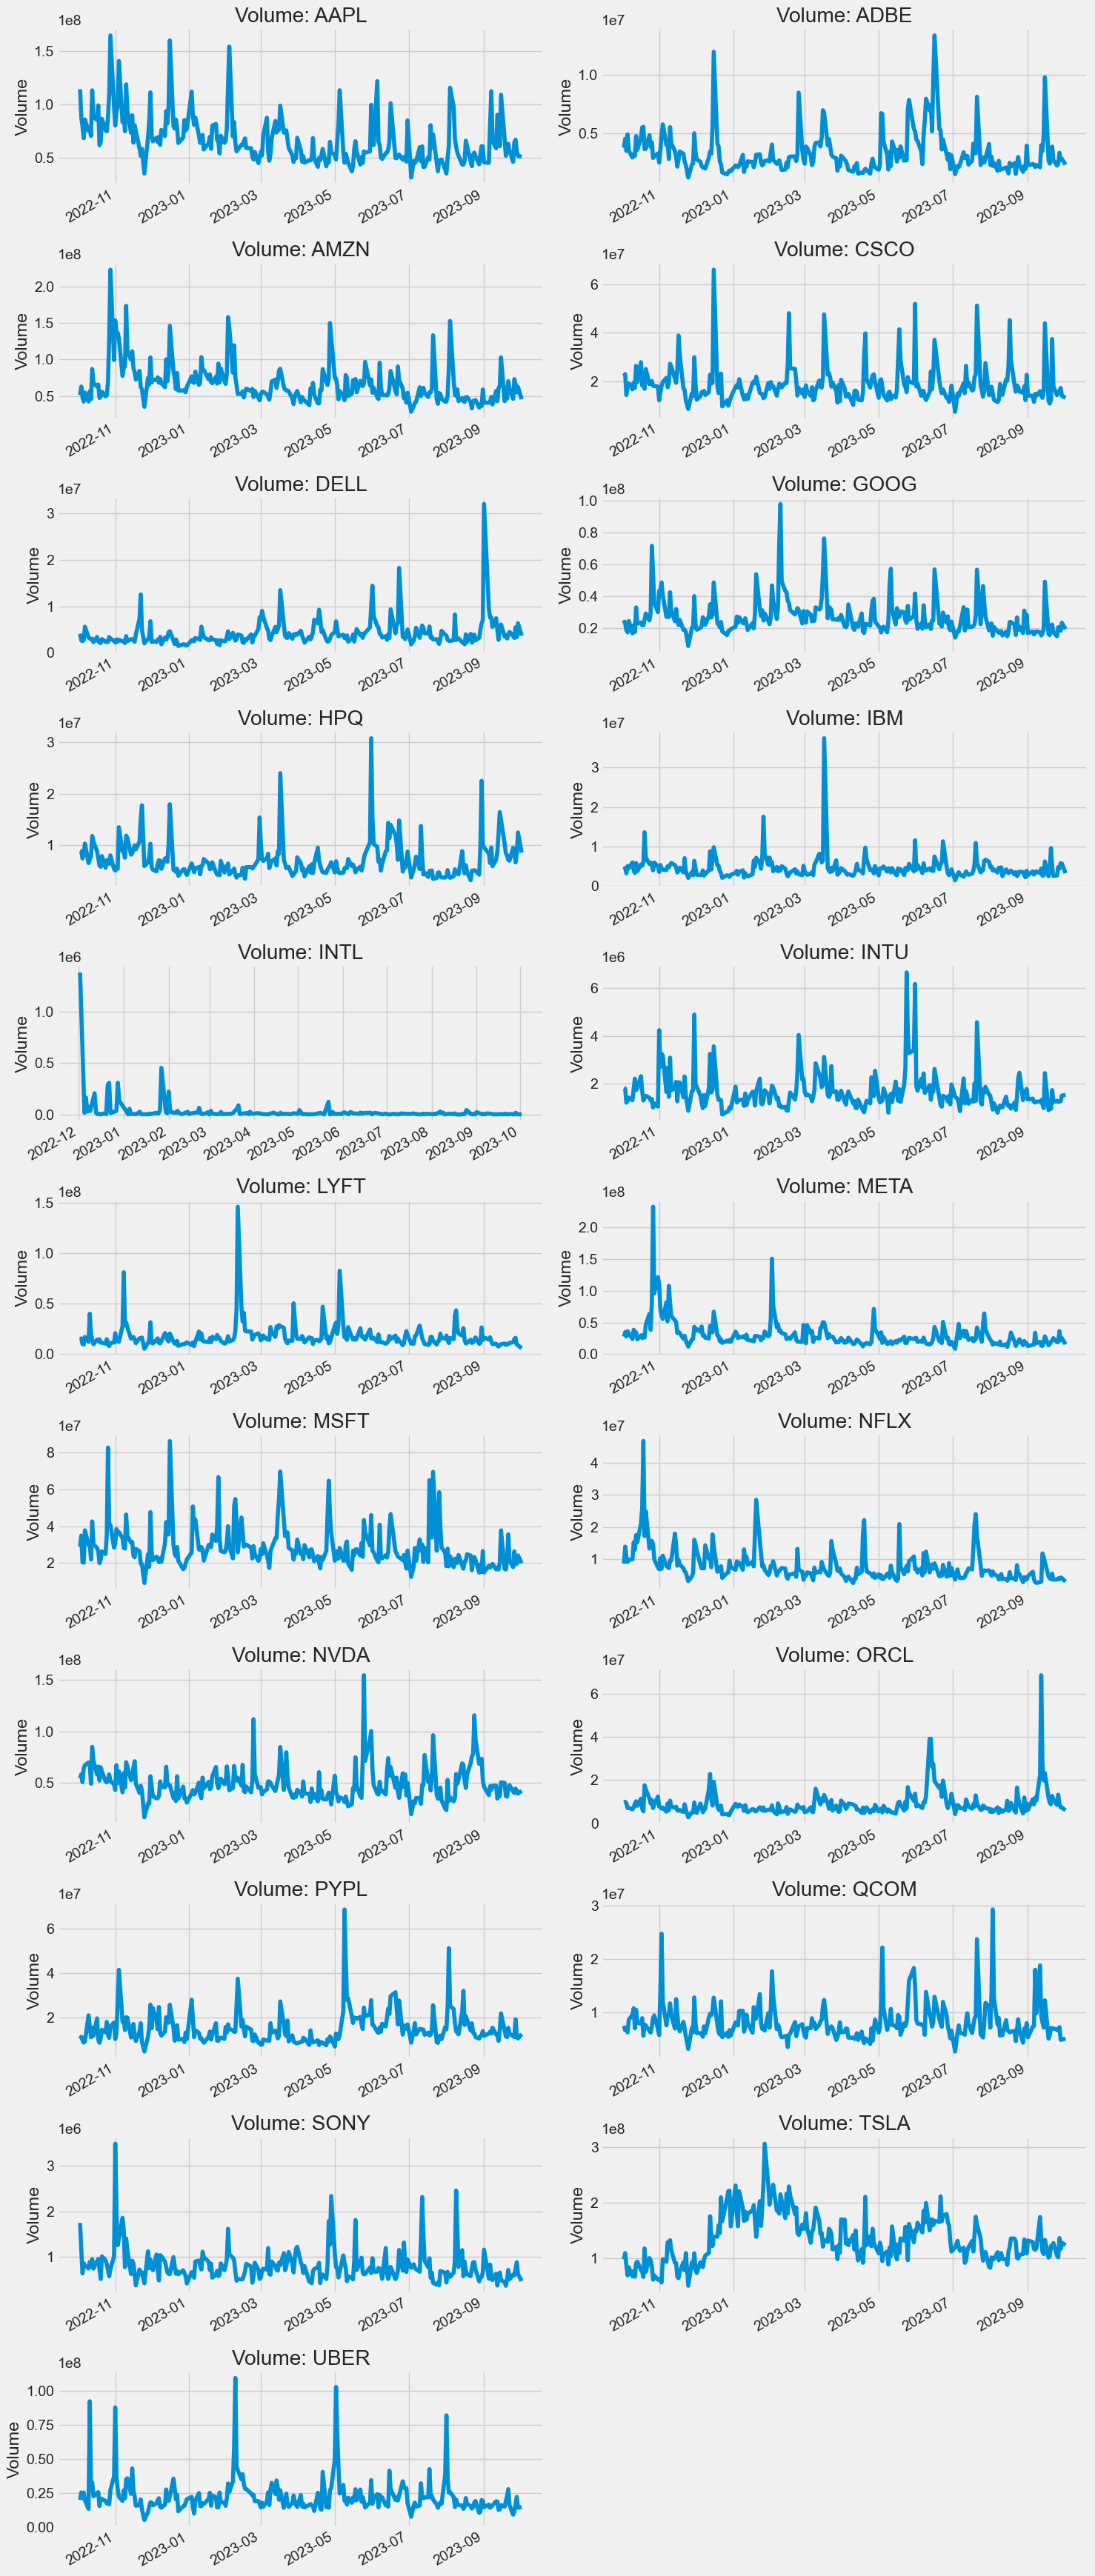

In [6]:
plt.figure(figsize=(15, 35))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(11, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume: {tech_list[i - 1]}")
    
plt.tight_layout()

#### c) Moving average analysis.

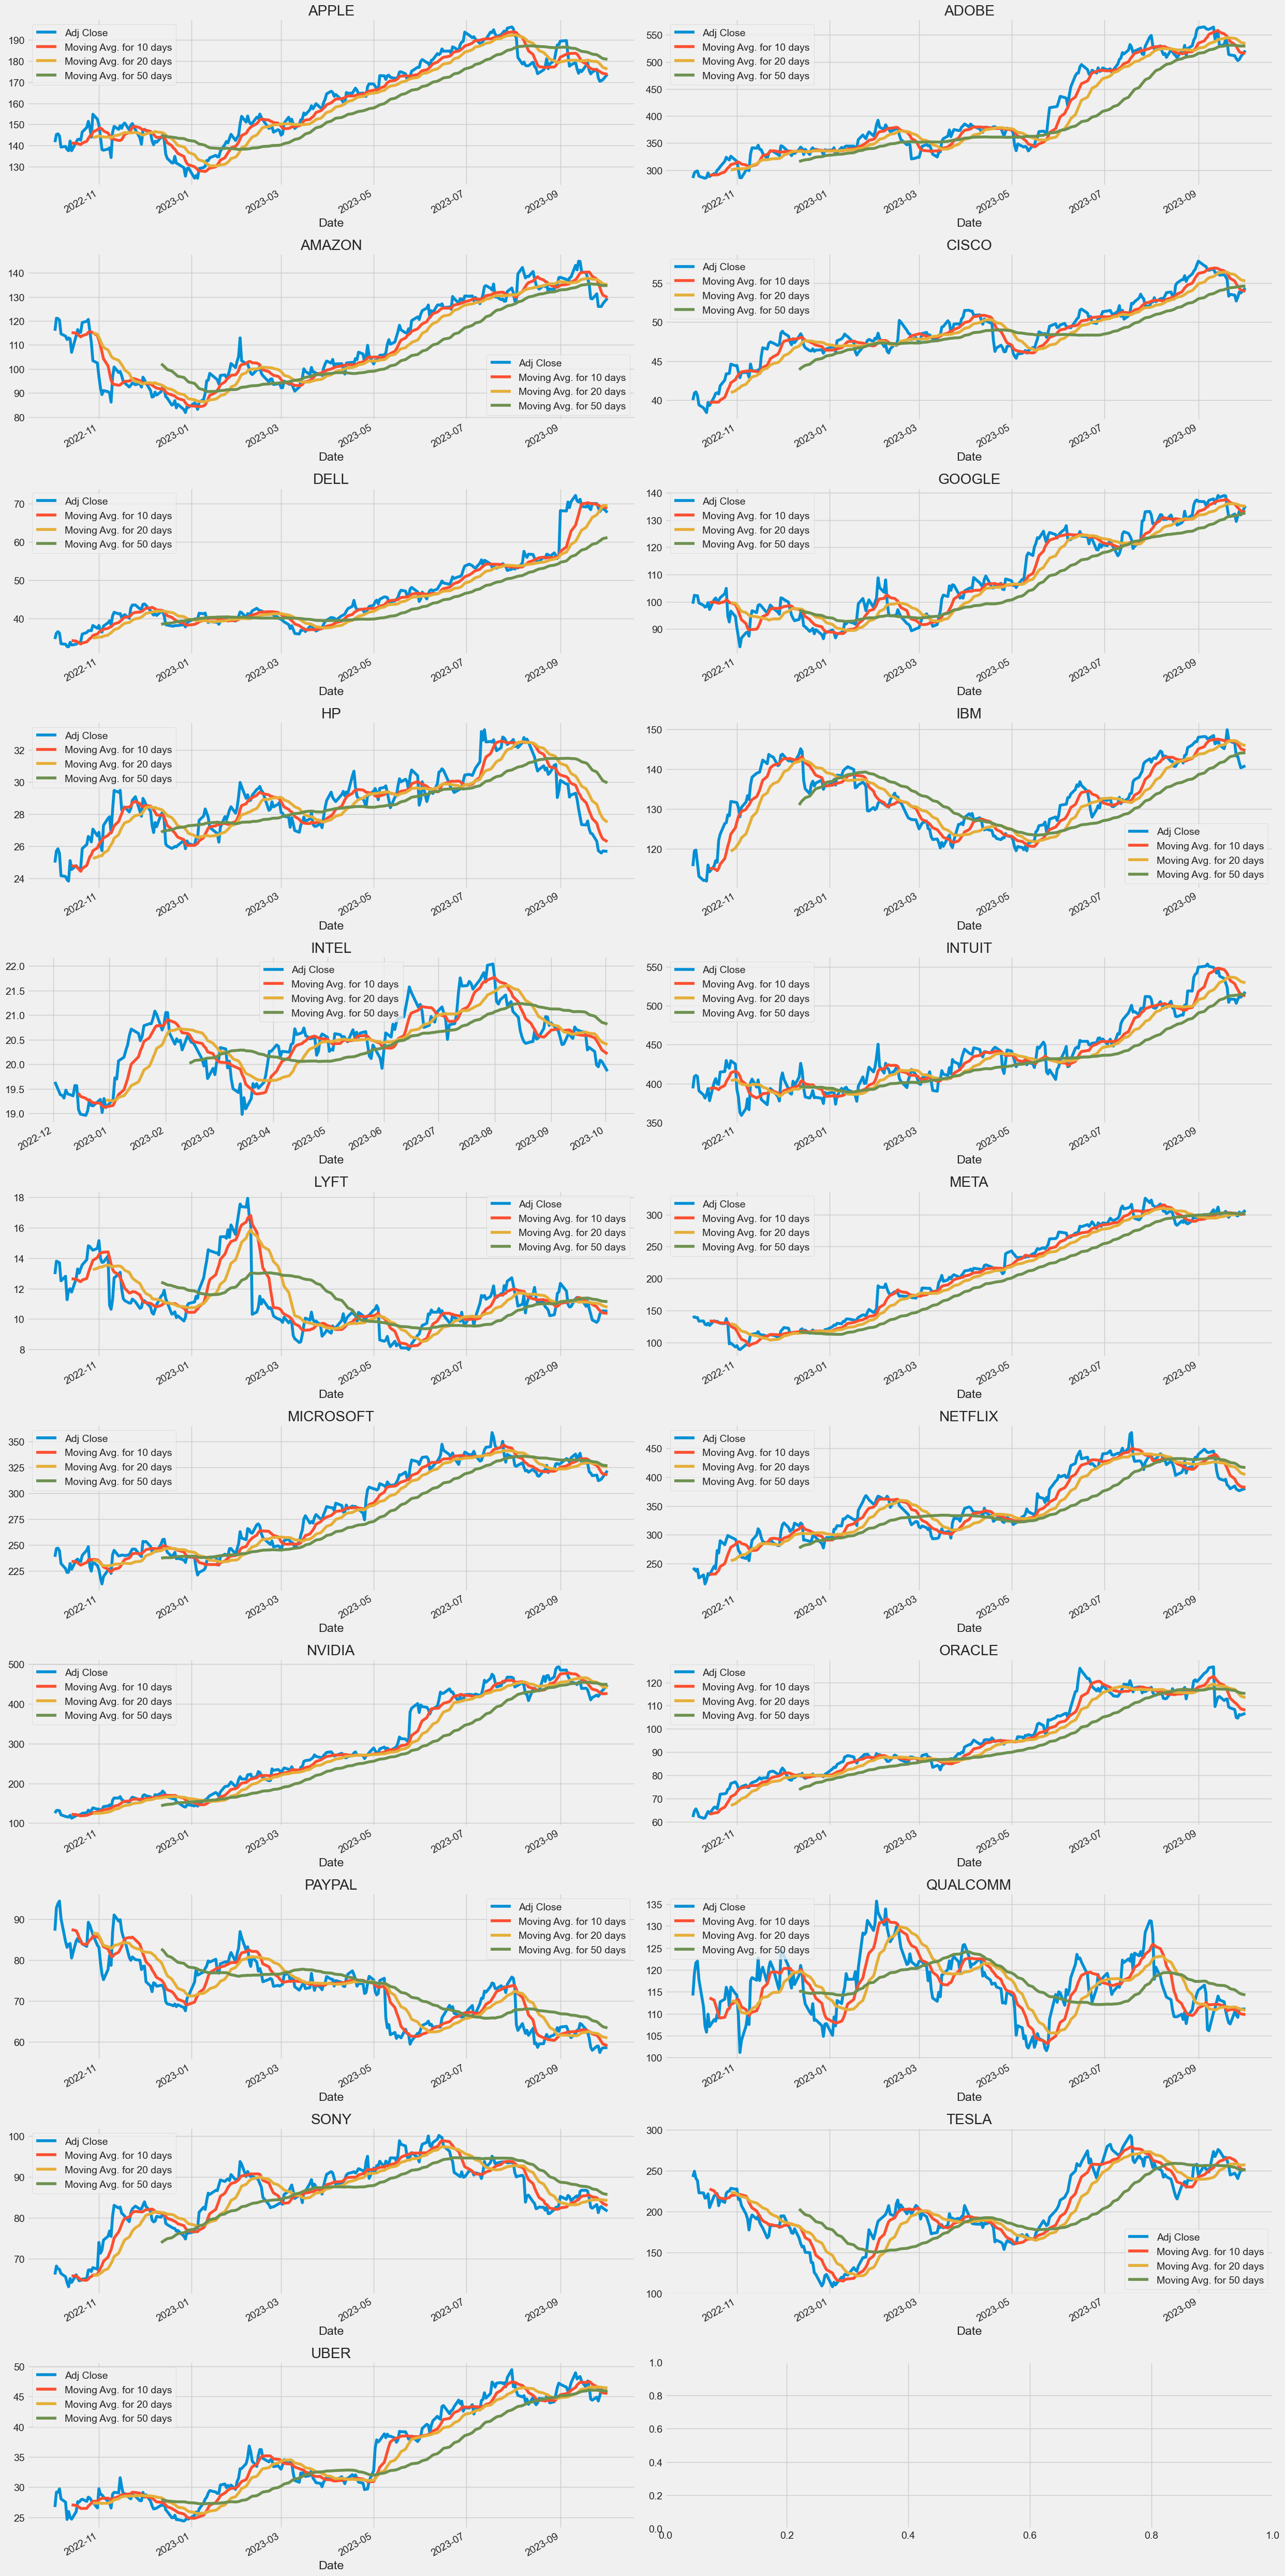

In [7]:
ma_day = [10, 20, 50]

# Calculate moving averages for each company
for ma in ma_day:
    for company in company_list:
        column_name = f"Moving Avg. for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Create subplots
nrows, ncols = 11, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_figheight(50)
fig.set_figwidth(25)

# Loop through the companies and plot their data
for i, company in enumerate(company_list):
    row_index = i // ncols  # Calculate row index
    col_index = i % ncols   # Calculate column index
    company[['Adj Close', f'Moving Avg. for 10 days', f'Moving Avg. for 20 days', f'Moving Avg. for 50 days']].plot(ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(company_name[i])  # Set the title using company_name

fig.tight_layout()
plt.show()


#### d) Risk (daily return) analysis of stocks.

In [8]:
# Calculating the percent change of each day.
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

In [9]:
AAPL

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-03  138.210007  143.070007  137.690002  142.449997  141.609909   
2022-10-04  145.029999  146.220001  144.259995  146.100006  145.238403   
2022-10-05  144.070007  147.380005  143.009995  146.399994  145.536606   
2022-10-06  145.809998  147.539993  145.220001  145.429993  144.572342   
2022-10-07  142.539993  143.100006  139.449997  140.089996  139.263824   
...                ...         ...         ...         ...         ...   
2023-09-26  174.820007  175.199997  171.660004  171.960007  171.960007   
2023-09-27  172.619995  173.039993  169.050003  170.429993  170.429993   
2023-09-28  169.339996  172.029999  167.619995  170.690002  170.690002   
2023-09-29  172.020004  173.070007  170.339996  171.210007  171.210007   
2023-10-02  171.220001  174.300003  171.000000  173.750000  173.750000   

               Volume Company Name  Moving Avg. for 10 days  \
Date                                                          
2022-10-03  114311700        APPLE                      NaN   
2022-10-04   87830100        APPLE                      NaN   
2022-10-05   79471000        APPLE                      NaN   
2022-10-06   68402200        APPLE                      NaN   
2022-10-07   85925600        APPLE                      NaN   
...               ...          ...                      ...   
2023-09-26   64588900        APPLE               175.425002   
2023-09-27   66921800        APPLE               175.047000   
2023-09-28   56294400        APPLE               174.542000   
2023-09-29   51814200        APPLE               174.162001   
2023-10-02   50897710        APPLE               173.740001   

            Moving Avg. for 20 days  Moving Avg. for 50 days  Daily Return  
Date                                                                        
2022-10-03                      NaN                      NaN           NaN  
2022-10-04                      NaN                      NaN      0.025623  
2022-10-05                      NaN                      NaN      0.002053  
2022-10-06                      NaN                      NaN     -0.006626  
2022-10-07                      NaN                      NaN     -0.036719  
...                             ...                      ...           ...  
2023-09-26               179.368000               182.566255     -0.023398  
2023-09-27               178.683500               182.105480     -0.008897  
2023-09-28               177.835500               181.622542      0.001526  
2023-09-29               177.002501               181.189352      0.003046  
2023-10-02               176.217001               180.830728      0.014836  

[251 rows x 11 columns]

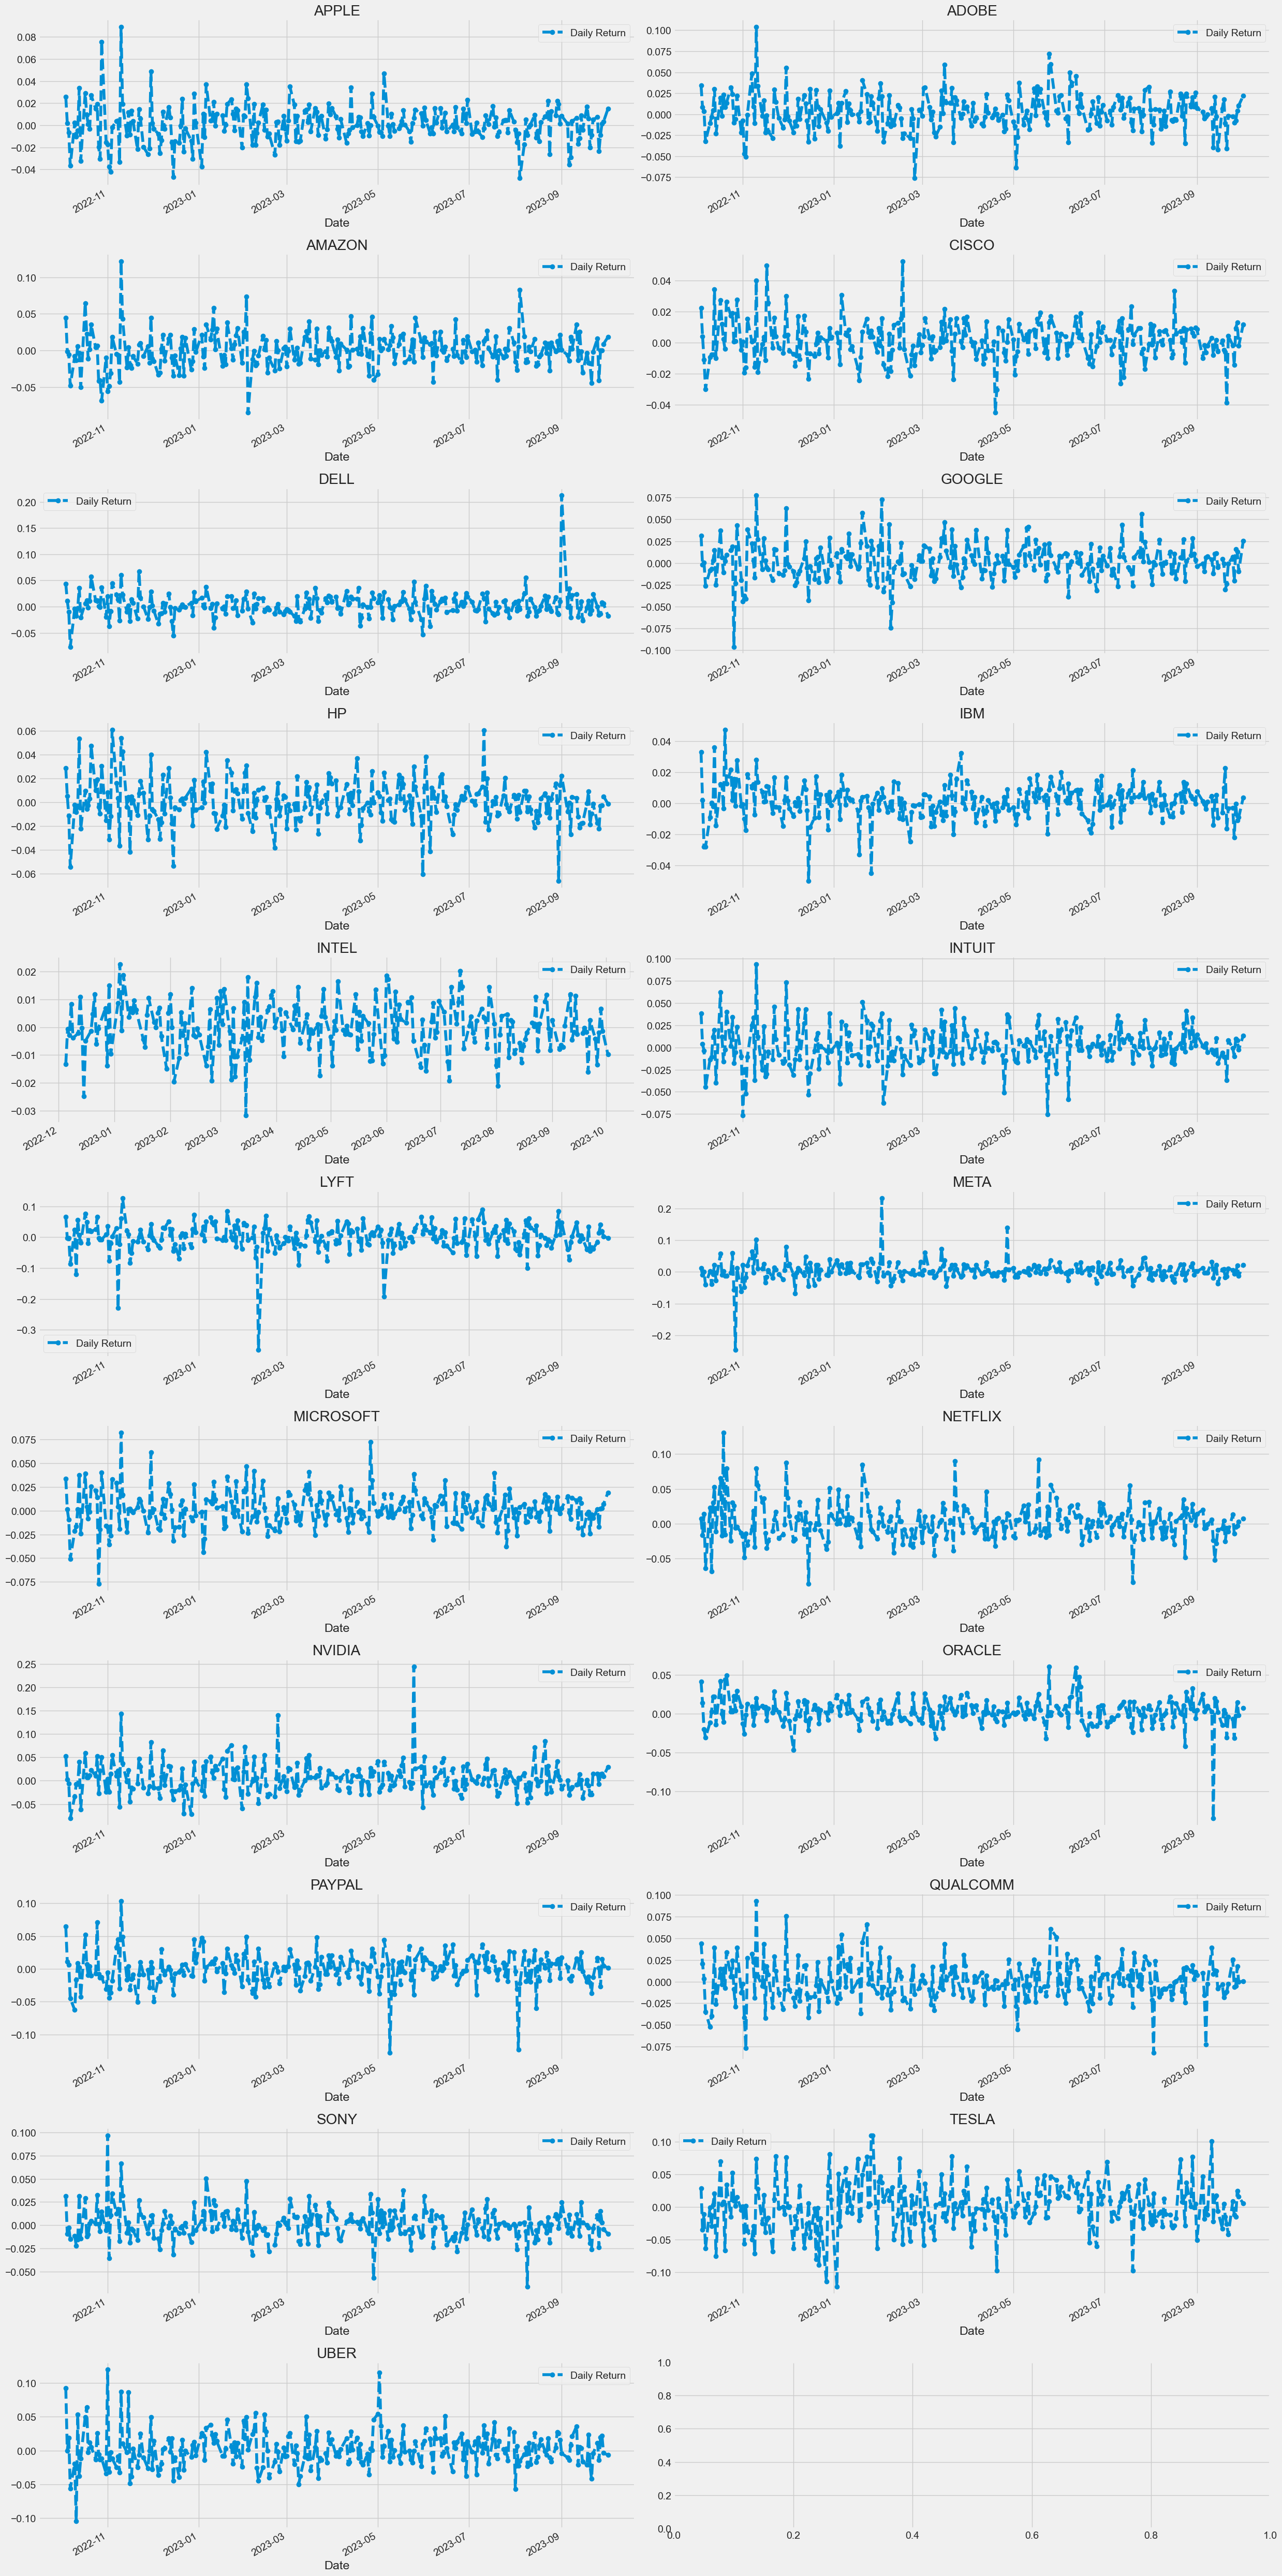

In [10]:
# Create subplots
nrows, ncols = 11, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_figheight(50)
fig.set_figwidth(25)

# Loop through the companies and plot their daily returns
for i, company in enumerate(company_list):
    row_index = i // ncols  # Calculate row index
    col_index = i % ncols   # Calculate column index
    
    # Plot the daily return for each company
    company['Daily Return'].plot(ax=axes[row_index, col_index], legend=True, linestyle='--', marker='o')
    axes[row_index, col_index].set_title(company_name[i])  # Set the title using company_name

fig.tight_layout()
plt.show()


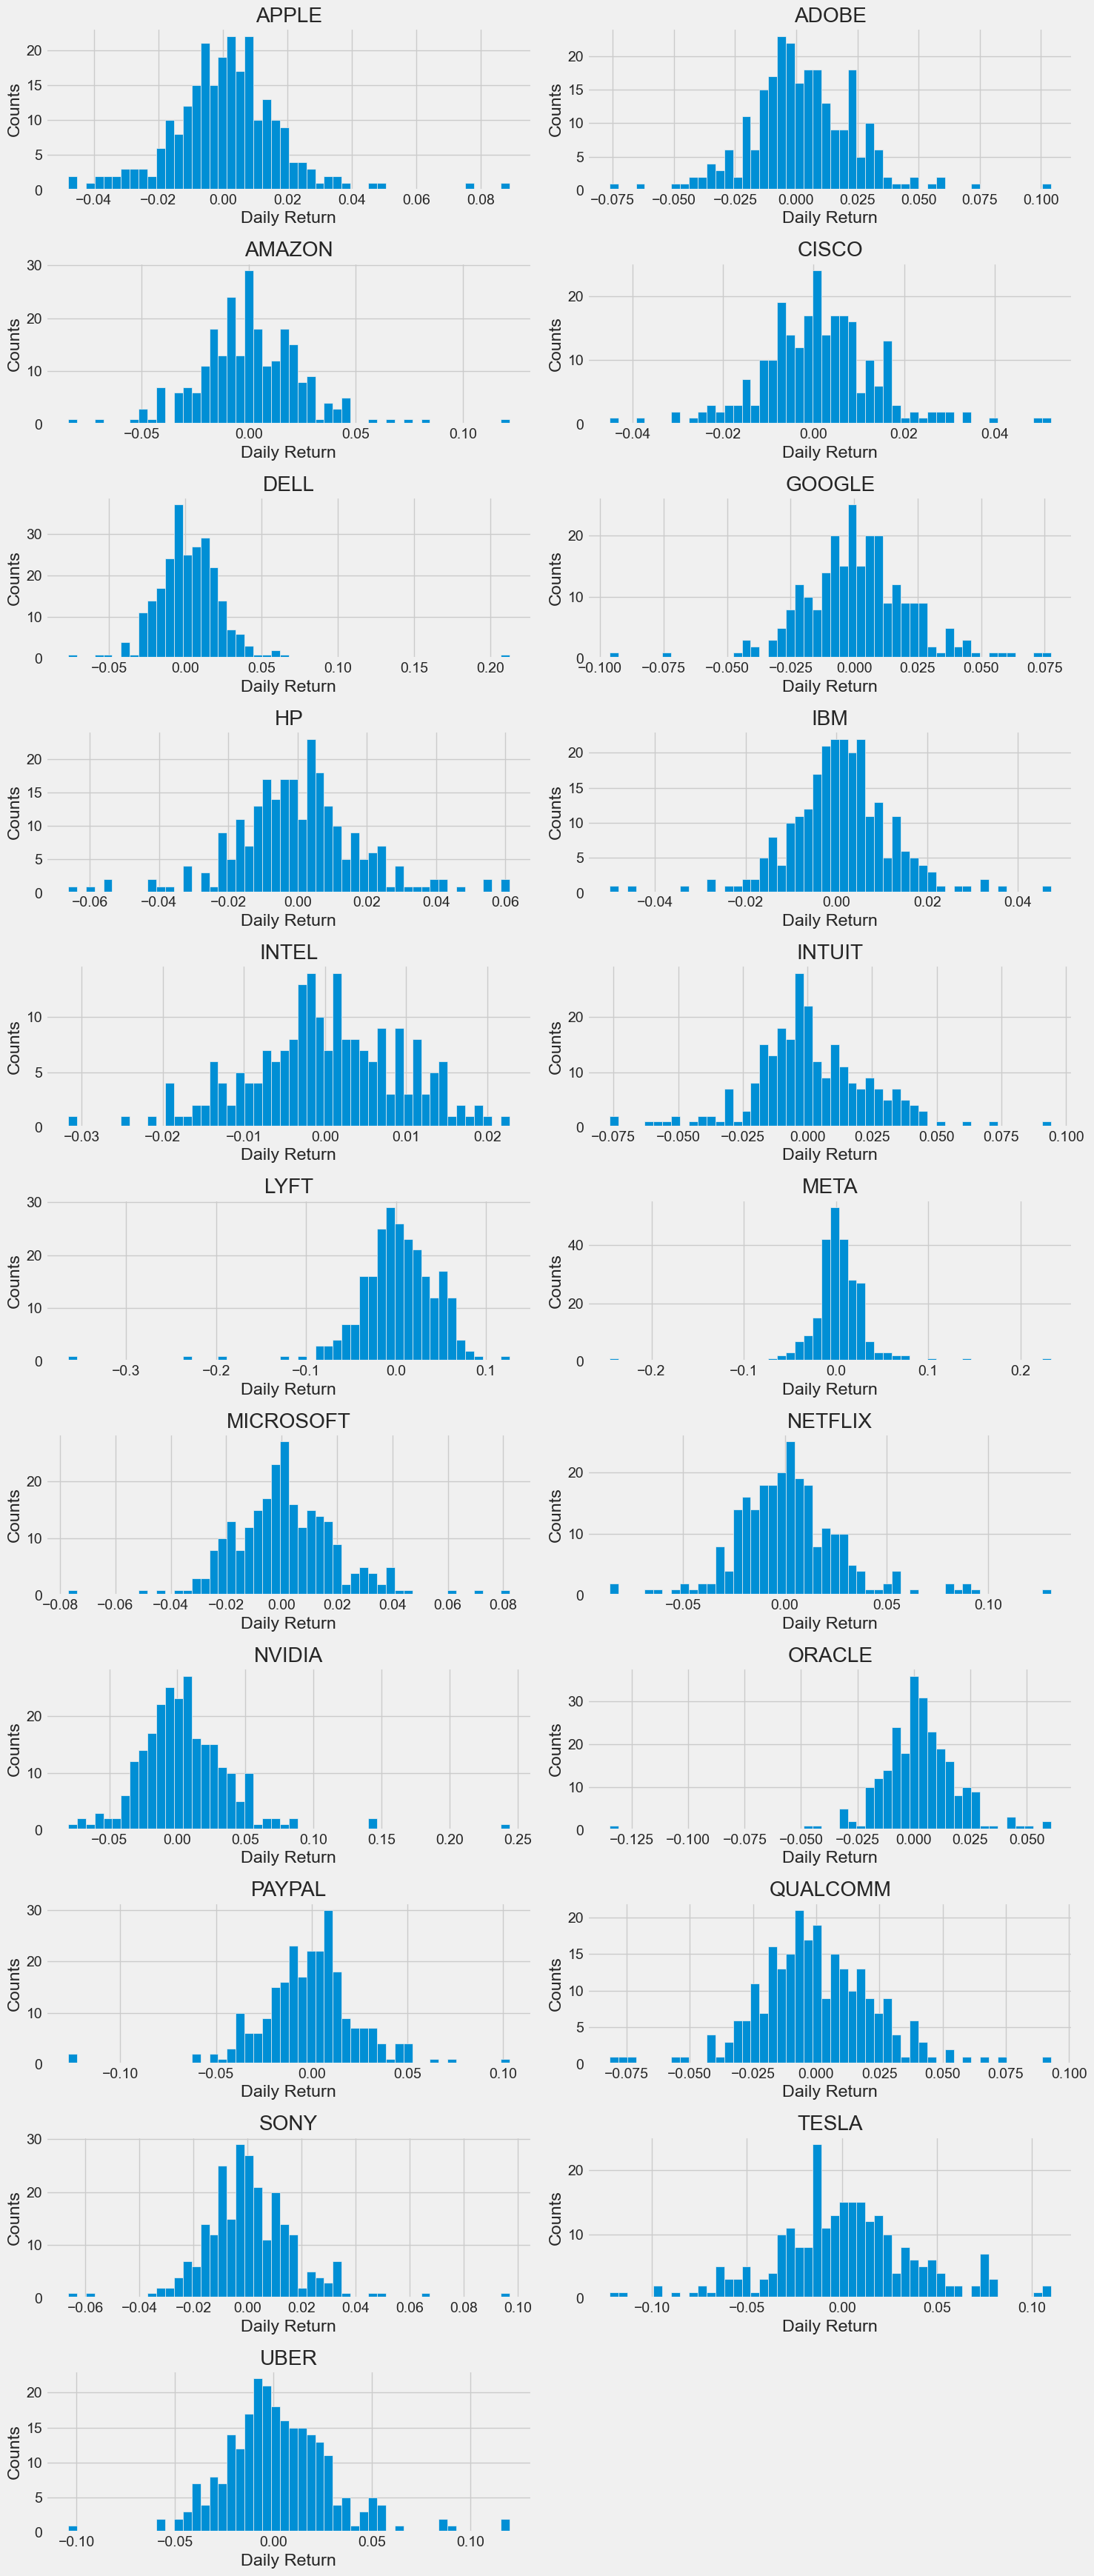

In [11]:
plt.figure(figsize=(15, 35))

for i, company in enumerate(company_list, 1):
    plt.subplot(11, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

#### e) Correlation analysis of closing prices of different stocks.

In [12]:
# Define new dataframe consisting of all the closing prices.
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Define a new dataframe consisting of the percentage changes of each closing price.
returns_df = closing_df.pct_change()

[*********************100%%**********************]  21 of 21 completed


In [13]:
returns_df

AAPL      ADBE      AMZN      CSCO      DELL      GOOG  \
Date                                                                     
2022-10-03       NaN       NaN       NaN       NaN       NaN       NaN   
2022-10-04  0.025623  0.034112  0.044960  0.022244  0.044036  0.031319   
2022-10-05  0.002053  0.008170 -0.001156  0.004065  0.010678 -0.001855   
2022-10-06 -0.006626  0.003464 -0.005374 -0.011193 -0.010037  0.000196   
2022-10-07 -0.036719 -0.032305 -0.047714 -0.030106 -0.076841 -0.026115   
...              ...       ...       ...       ...       ...       ...   
2023-09-26 -0.023398 -0.010360 -0.040299 -0.014398 -0.015708 -0.020580   
2023-09-27 -0.008897 -0.007308  0.000000  0.009296 -0.014217  0.015527   
2023-09-28  0.001526  0.004119  0.000000  0.012782  0.008094  0.012703   
2023-09-29  0.003046  0.010363  0.009049 -0.002227  0.005839 -0.009615   
2023-10-02  0.014836  0.022024  0.018408  0.011719 -0.017417  0.025180   

                 HPQ       IBM      INTL      INTU  ...      META      MSFT  \
Date                                                ...                       
2022-10-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-10-04  0.028969  0.032837       NaN  0.038332  ...  0.012048  0.033812   
2022-10-05  0.005255  0.001912       NaN  0.003811  ... -0.009267  0.001286   
2022-10-06 -0.011202 -0.027915       NaN -0.003585  ...  0.000648 -0.009671   
2022-10-07 -0.054381 -0.027898       NaN -0.044637  ... -0.040411 -0.050853   
...              ...       ...       ...       ...  ...       ...       ...   
2023-09-26 -0.022053 -0.022119 -0.013378 -0.010073  ... -0.006216 -0.017006   
2023-09-27 -0.003110 -0.000489 -0.001901  0.010036  ... -0.004081  0.002082   
2023-09-28 -0.002730 -0.011106  0.006617  0.007870  ...  0.020891  0.002717   
2023-09-29  0.005084 -0.009041 -0.001295 -0.002538  ... -0.012337  0.006727   
2023-10-02 -0.001167  0.003564 -0.009794  0.013426  ...  0.022018  0.019161   

                NFLX      NVDA      ORCL      PYPL      QCOM      SONY  \
Date                                                                     
2022-10-03       NaN       NaN       NaN       NaN       NaN       NaN   
2022-10-04  0.007112  0.052350  0.041376  0.064350  0.043934  0.031439   
2022-10-05 -0.016657  0.003190  0.014462  0.011208  0.020593 -0.009232   
2022-10-06  0.013898 -0.005981 -0.020108  0.006288  0.003123 -0.002958   
2022-10-07 -0.063620 -0.080274 -0.030781 -0.045012 -0.034882 -0.014835   
...              ...       ...       ...       ...       ...       ...   
2023-09-26 -0.014423 -0.007366 -0.031579  0.001189 -0.006429 -0.023658   
2023-09-27 -0.004377  0.013290 -0.002479 -0.026981 -0.004830  0.015375   
2023-09-28 -0.003258  0.014623  0.014624  0.014649  0.017492  0.002786   
2023-09-29  0.003295  0.009515 -0.002167  0.004813 -0.000360 -0.004470   
2023-10-02  0.007230  0.029495  0.007458  0.001711  0.000360 -0.009222   

                TSLA      UBER  
Date                            
2022-10-03       NaN       NaN  
2022-10-04  0.029043  0.092440  
2022-10-05 -0.034598 -0.000343  
2022-10-06 -0.011129  0.018849  
2022-10-07 -0.063243 -0.055836  
...              ...       ...  
2023-09-26 -0.011620 -0.014251  
2023-09-27 -0.014829  0.019652  
2023-09-28  0.024449  0.022153  
2023-09-29  0.015586 -0.003251  
2023-10-02  0.005515 -0.006741  

[251 rows x 21 columns]

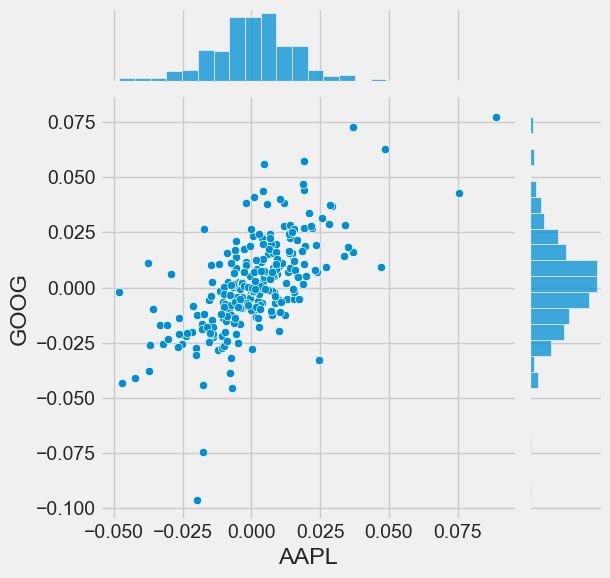

In [14]:
sns.jointplot(x='AAPL', y='GOOG', data=returns_df, kind='scatter')

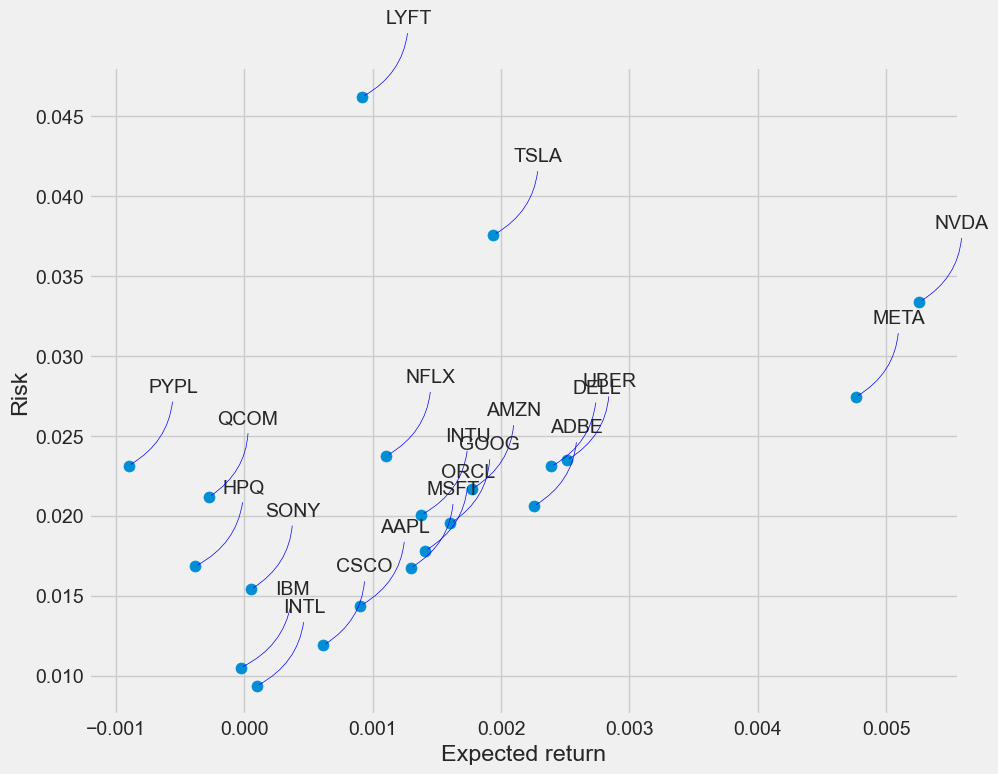

In [15]:
rets = returns_df.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# LSTM Model implementations

## 1) Apple (AAPL)

[*********************100%%**********************]  1 of 1 completed
[array([0.05298949, 0.0549738 , 0.05406384, 0.05128305, 0.04846118,
       0.04800717, 0.04899737, 0.04649055, 0.04680562, 0.04779387,
       0.05073511, 0.04972143, 0.047379  , 0.04291722, 0.04765101,
       0.04360605, 0.0442851 , 0.04285851, 0.04177438, 0.04007577,
       0.04031452, 0.03645156, 0.03798187, 0.03763549, 0.03277255,
       0.02880978, 0.03063167, 0.0298039 , 0.0298176 , 0.02863953,
       0.02643603, 0.02683916, 0.03428525, 0.033342  , 0.03349661,
       0.03541438, 0.03894272, 0.03801318, 0.03765311, 0.03890944,
       0.03811102, 0.0382891 , 0.03626564, 0.0290133 , 0.0306669 ,
       0.02792917, 0.02725795, 0.0295221 , 0.0290544 , 0.0272325 ,
       0.02333823, 0.02510728, 0.02805637, 0.02657106, 0.0256748 ,
       0.02520514, 0.02536951, 0.0239664 , 0.02436953, 0.02329909])]
[0.027717817305234593]

[array([0.05298949, 0.0549738 , 0.05406384, 0.05128305, 0.04846118,
       0.04800717, 0.04899737, 0

2023-10-02 20:14:42.830722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:14:43.002003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:14:43.039331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:14:43.109199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:14:43.202515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 40s 15ms/step - loss: 0.0019
Epoch 2/5
2569/2569 [==============================] - 38s 15ms/step - loss: 5.6702e-04
Epoch 3/5
2569/2569 [==============================] - 39s 15ms/step - loss: 4.6820e-04
Epoch 4/5
2569/2569 [==============================] - 273s 106ms/step - loss: 3.4488e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 20:21:50.765892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:21:50.834467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:21:50.872897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 12ms/step
RMSE: 2.999873604797018


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/1457685668.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


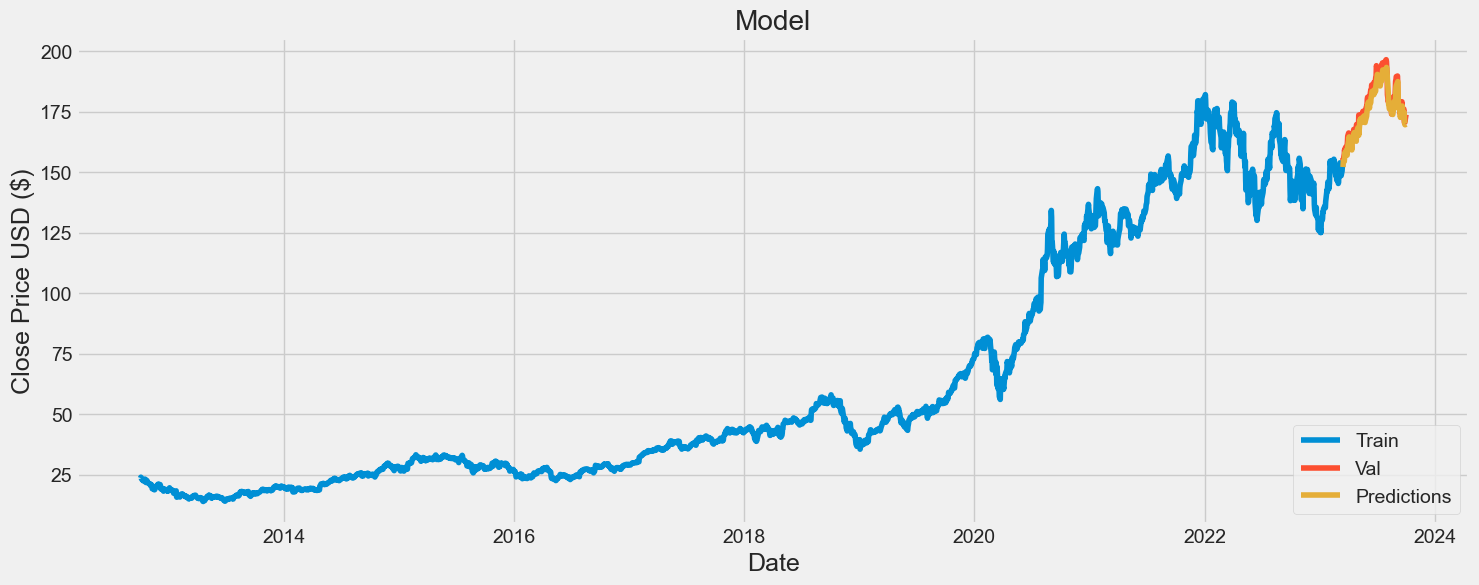

/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'AAPL'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
valid

model.save(f'./models/{ticker_symbol}_model.h5')


## 2) Adobe (ADBE)

[*********************100%%**********************]  1 of 1 completed
[array([0.00161374, 0.00165941, 0.0017812 , 0.0014615 , 0.00109612,
       0.00027403, 0.        , 0.00041105, 0.00065463, 0.00124837,
       0.00263374, 0.00293822, 0.00298389, 0.00263374, 0.00301434,
       0.00274031, 0.00281643, 0.00287733, 0.00380598, 0.00383643,
       0.00433882, 0.00438449, 0.00415614, 0.00438449, 0.00298389,
       0.00223792, 0.00211613, 0.00181165, 0.00156807, 0.00111135,
       0.0017203 , 0.00173553, 0.00214657, 0.0017203 , 0.00202478,
       0.00287733, 0.00270986, 0.0025424 , 0.00360808, 0.00392778,
       0.00471942, 0.00485644, 0.00576987, 0.00592212, 0.00552629,
       0.0060439 , 0.00645495, 0.00613525, 0.00677465, 0.00612002,
       0.00921049, 0.00899735, 0.00910392, 0.01001736, 0.00968243,
       0.00943884, 0.00916481, 0.00919526, 0.00881466, 0.00820571])]
[0.009393173772659288]

[array([0.00161374, 0.00165941, 0.0017812 , 0.0014615 , 0.00109612,
       0.00027403, 0.        , 0

2023-10-02 20:23:29.130621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:23:29.308953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:23:29.346819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:23:29.422999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:23:29.525607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 41s 16ms/step - loss: 0.0013
Epoch 2/5
2569/2569 [==============================] - 40s 15ms/step - loss: 4.7082e-04
Epoch 3/5
2569/2569 [==============================] - 38s 15ms/step - loss: 4.3537e-04
Epoch 4/5
2569/2569 [==============================] - 39s 15ms/step - loss: 4.2982e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 20:26:45.171896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:26:45.240126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:26:45.280211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 13ms/step
RMSE: 18.743071690597354


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/1827629233.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


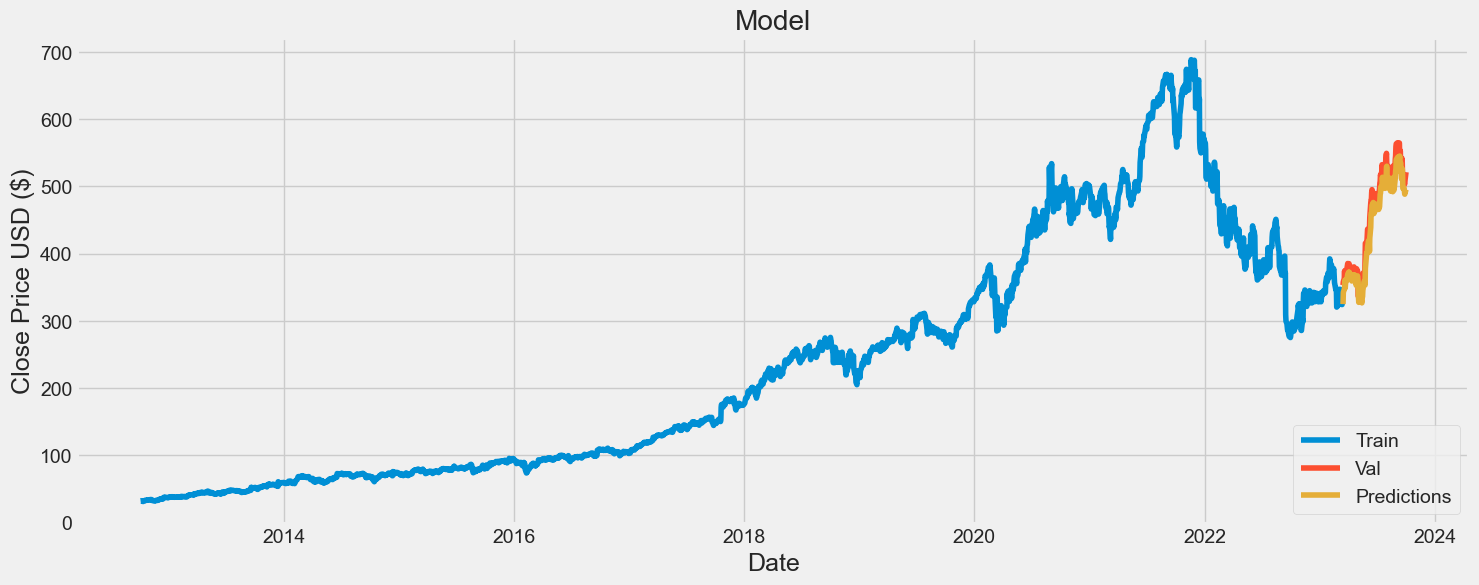

/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'ADBE'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
valid

model.save(f'./models/{ticker_symbol}_model.h5')


## 3) Amazon (AMZN)

[*********************100%%**********************]  1 of 1 completed
[array([0.00854504, 0.01006036, 0.01135636, 0.01079808, 0.01095474,
       0.00864758, 0.00694712, 0.0067278 , 0.006198  , 0.0067164 ,
       0.00664804, 0.0076592 , 0.00690724, 0.00552579, 0.00375412,
       0.00390508, 0.00224735, 0.00066082, 0.00502448, 0.00350062,
       0.00328699, 0.00336675, 0.00391078, 0.0048308 , 0.0032642 ,
       0.00192264, 0.00162641, 0.00167198, 0.00170901, 0.00066936,
       0.        , 0.00131879, 0.00259485, 0.00375412, 0.00496467,
       0.00549161, 0.00655689, 0.00649423, 0.00755097, 0.00873588,
       0.00895805, 0.00846814, 0.00908338, 0.00950208, 0.00933403,
       0.00930555, 0.00773896, 0.00857067, 0.00887545, 0.00873018,
       0.00814342, 0.0094736 , 0.01133642, 0.01064997, 0.01164973,
       0.01034519, 0.01082941, 0.00798392, 0.00789277, 0.00700123])]
[0.008621943364694407]

[array([0.00854504, 0.01006036, 0.01135636, 0.01079808, 0.01095474,
       0.00864758, 0.00694712, 0

2023-10-02 20:26:46.662296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:26:46.832148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:26:46.874101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:26:46.944242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:26:47.035738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 86s 33ms/step - loss: 0.0017
Epoch 2/5
2569/2569 [==============================] - 40s 15ms/step - loss: 5.8389e-04
Epoch 3/5
2569/2569 [==============================] - 40s 15ms/step - loss: 5.6734e-04
Epoch 4/5
2569/2569 [==============================] - 41s 16ms/step - loss: 4.8313e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 20:30:51.401910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:30:51.470205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:30:51.511037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 13ms/step
RMSE: 4.889047952352333


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/3149330024.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


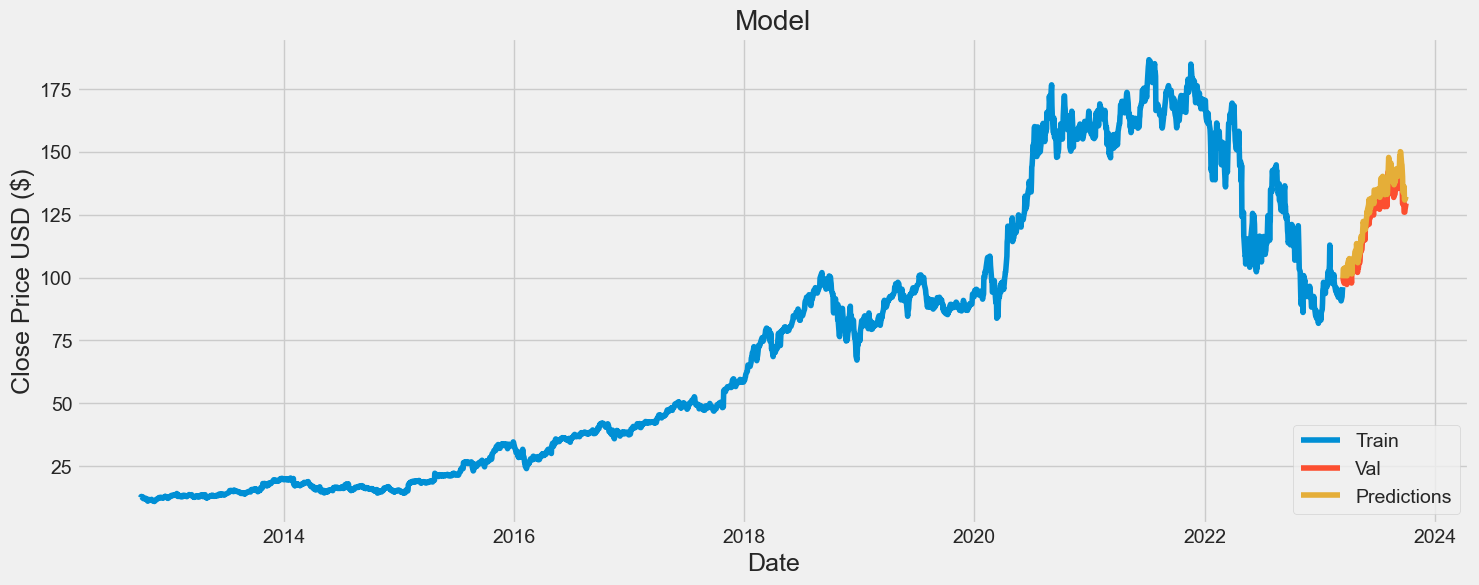

/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'AMZN'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
valid

model.save(f'./models/{ticker_symbol}_model.h5')


## 4) Cisco (CSCO)

[*********************100%%**********************]  1 of 1 completed
[array([0.04348751, 0.0447603 , 0.04412389, 0.04327537, 0.04412389,
       0.04200254, 0.03160797, 0.03054732, 0.03372932, 0.03669918,
       0.04306323, 0.04009333, 0.03797202, 0.02588038, 0.02906239,
       0.02524397, 0.0118795 , 0.00806112, 0.00997033, 0.00700042,
       0.01463726, 0.01124312, 0.01230377, 0.01400085, 0.00827322,
       0.00021214, 0.        , 0.00084856, 0.00063642, 0.01781927,
       0.02375903, 0.02481969, 0.03139583, 0.03224439, 0.03521425,
       0.04285109, 0.04751803, 0.04539668, 0.04263895, 0.04645737,
       0.04433602, 0.04688165, 0.04985151, 0.05070003, 0.05642766,
       0.0534578 , 0.06300385, 0.06279171, 0.06173101, 0.06194315,
       0.06448878, 0.06979213, 0.07551972, 0.07318627, 0.07254985,
       0.06661009, 0.06385236, 0.06576157, 0.06003394, 0.05579128])]
[0.06003394060984013]

[array([0.04348751, 0.0447603 , 0.04412389, 0.04327537, 0.04412389,
       0.04200254, 0.03160797, 0.

2023-10-02 20:30:52.898987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:30:53.069151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:30:53.110107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:30:53.183787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:30:53.286061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 40s 15ms/step - loss: 0.0017
Epoch 2/5
2569/2569 [==============================] - 38s 15ms/step - loss: 6.3910e-04
Epoch 3/5
2569/2569 [==============================] - 39s 15ms/step - loss: 4.9852e-04
Epoch 4/5
2569/2569 [==============================] - 39s 15ms/step - loss: 4.4833e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 2s

2023-10-02 20:34:06.574854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:34:06.650760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:34:06.690923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 13ms/step
RMSE: 0.7251050180691824


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/848515.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


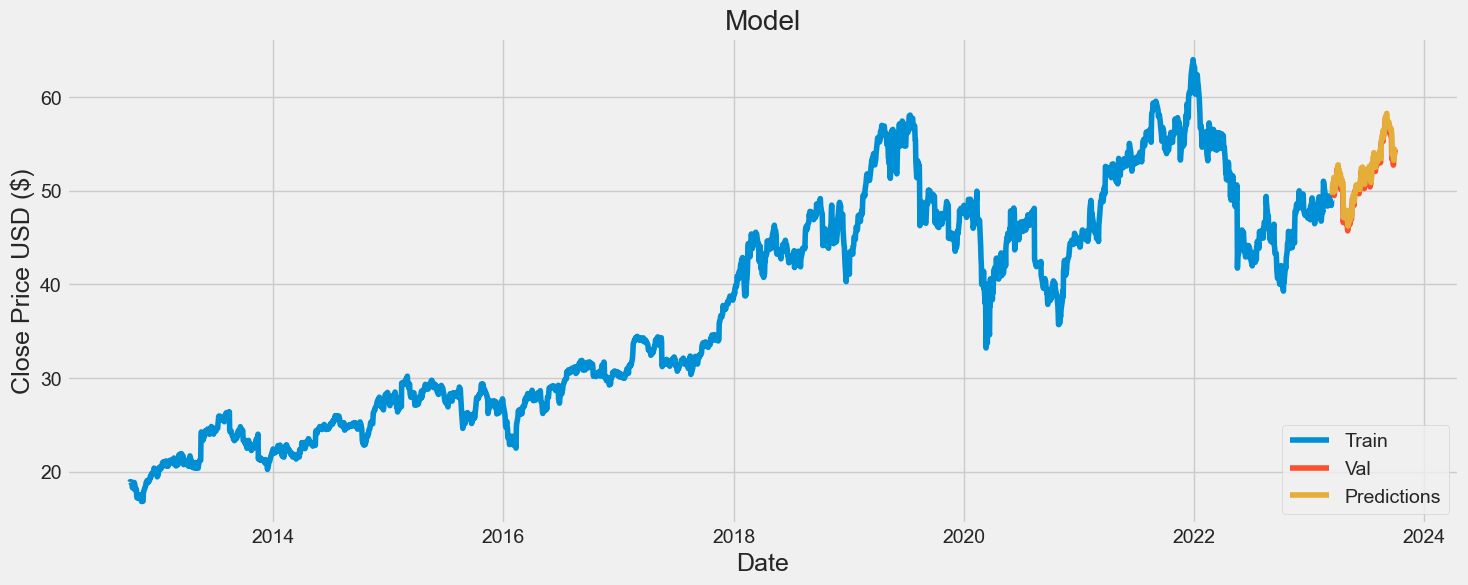

                Close  Predictions
Date                              
2023-03-16  50.119999    49.539829
2023-03-17  50.189999    50.583893
2023-03-20  50.939999    50.652966
2023-03-21  50.669998    51.385586
2023-03-22  49.459999    51.107346
...               ...          ...
2023-09-26  52.709999    53.999355
2023-09-27  53.200001    53.224163
2023-09-28  53.880001    53.735756
2023-09-29  53.759998    54.418983
2023-10-02  54.389999    54.266823

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'CSCO'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


## 5) Dell (DELL)

[*********************100%%**********************]  1 of 1 completed
[array([0.00116619, 0.        , 0.00349857, 0.00419829, 0.01049572,
       0.01329457, 0.01240827, 0.01399427, 0.01655989, 0.01119541,
       0.00900299, 0.00349857, 0.0010729 , 0.01259484, 0.02449   ,
       0.03526558, 0.02952793, 0.03102067, 0.02682236, 0.02612267,
       0.02864162, 0.02668242, 0.02803522, 0.02789526, 0.0264492 ,
       0.02462993, 0.02453663, 0.02397688, 0.02351038, 0.02383694,
       0.02248415, 0.02355705, 0.02416347, 0.02383694, 0.02668242,
       0.02630926, 0.02481652, 0.02225092, 0.02047829, 0.02033836,
       0.02043166, 0.02094476, 0.02164448, 0.02299728, 0.02313722,
       0.02309057, 0.02094476, 0.0242101 , 0.01977859, 0.01851909,
       0.02602937, 0.02854833, 0.02957459, 0.02668242, 0.02915475,
       0.02808185, 0.02738214, 0.03158044, 0.0323268 , 0.03088071])]
[0.03036759548736684]

[array([0.00116619, 0.        , 0.00349857, 0.00419829, 0.01049572,
       0.01329457, 0.01240827, 0.

2023-10-02 20:35:31.275255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:35:31.450868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:35:31.490599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:35:31.564617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:35:31.663291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1644/1644 [==============================] - 27s 16ms/step - loss: 0.0015
Epoch 2/5
1644/1644 [==============================] - 26s 16ms/step - loss: 5.1051e-04
Epoch 3/5
1644/1644 [==============================] - 25s 15ms/step - loss: 4.2483e-04
Epoch 4/5
1644/1644 [==============================] - 25s 15ms/step - loss: 3.9712e-04
Epoch 5/5
1/3 [=========>....................] - ETA: 0s

2023-10-02 20:37:39.550636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:37:39.619957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:37:39.670610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 51ms/step
RMSE: 1.630590629629527


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/2712654671.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


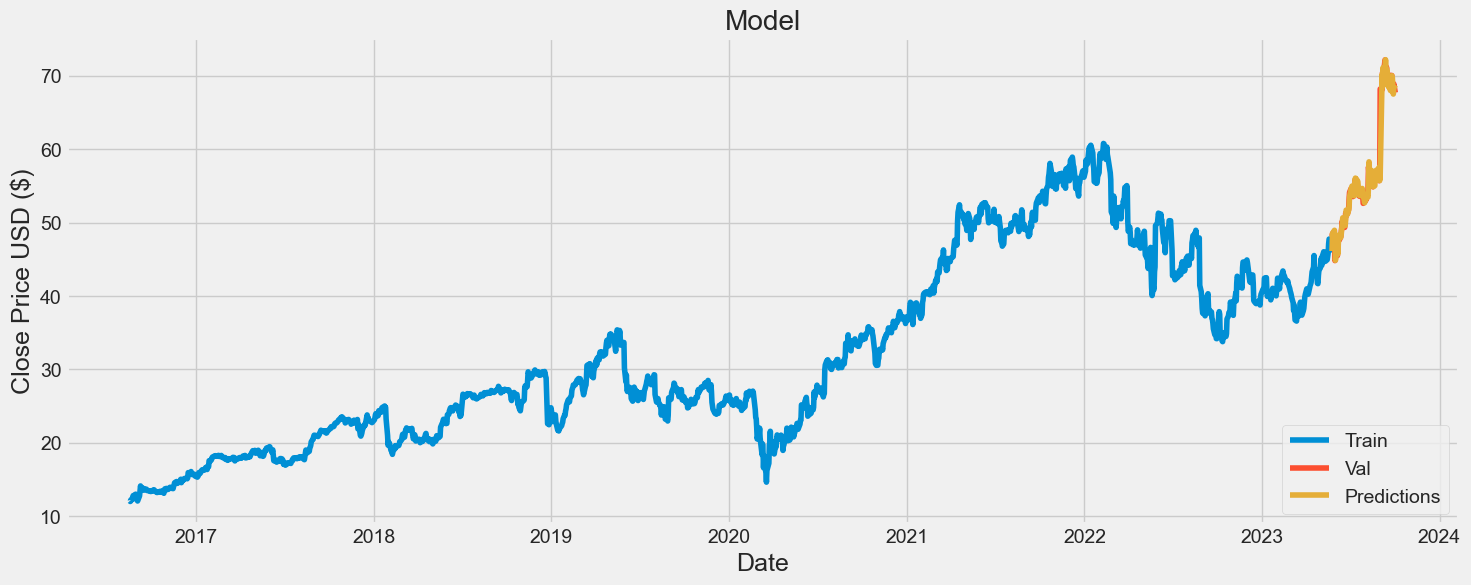

                Close  Predictions
Date                              
2023-05-25  48.080002    46.117313
2023-05-26  48.509998    48.517807
2023-05-30  47.320000    48.944584
2023-05-31  44.810001    47.578342
2023-06-01  45.459999    44.851742
...               ...          ...
2023-09-26  68.930000    69.756790
2023-09-27  67.949997    68.474503
2023-09-28  68.500000    67.500366
2023-09-29  68.900002    68.316757
2023-10-02  67.699997    68.734894

[89 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'DELL'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


## 6) Google (GOOG)

[*********************100%%**********************]  1 of 1 completed
[array([2.03209775e-02, 2.13406352e-02, 2.23676904e-02, 2.22936724e-02,
       2.04782818e-02, 1.79337647e-02, 1.80207355e-02, 1.93013199e-02,
       1.80558951e-02, 1.73582294e-02, 1.80466411e-02, 2.00433851e-02,
       8.84937179e-03, 6.40477829e-03, 5.82741490e-03, 6.13829634e-03,
       5.57388576e-03, 5.65901430e-03, 5.17601931e-03, 6.12905648e-03,
       7.47810363e-03, 7.53916887e-03, 6.62129133e-03, 6.39182548e-03,
       3.69001823e-03, 9.45639624e-04, 2.93312957e-03, 3.46425116e-03,
       2.19661960e-03, 9.93752058e-04, 1.48092766e-05, 0.00000000e+00,
       3.89172200e-03, 4.21742688e-03, 3.45869591e-03, 3.84730834e-03,
       2.58523203e-03, 4.35436663e-03, 6.75269000e-03, 8.27385070e-03,
       9.47300530e-03, 8.89562775e-03, 8.11470413e-03, 7.52067499e-03,
       8.13321218e-03, 6.85261364e-03, 7.07653841e-03, 9.19726933e-03,
       9.32311275e-03, 1.02743076e-02, 1.01373537e-02, 1.36201129e-02,
       

2023-10-02 20:37:41.145592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:37:41.316704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:37:41.364912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:37:41.456524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   4/2569 [..............................] - ETA: 56s - loss: 0.2020  

2023-10-02 20:37:41.590118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 41s 15ms/step - loss: 0.0016
Epoch 2/5
2569/2569 [==============================] - 39s 15ms/step - loss: 5.5963e-04
Epoch 3/5
2569/2569 [==============================] - 39s 15ms/step - loss: 5.0573e-04
Epoch 4/5
2569/2569 [==============================] - 39s 15ms/step - loss: 4.2845e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 20:40:55.117131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:40:55.185184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:40:55.225876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step
RMSE: 2.0375653711733785


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/344087139.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


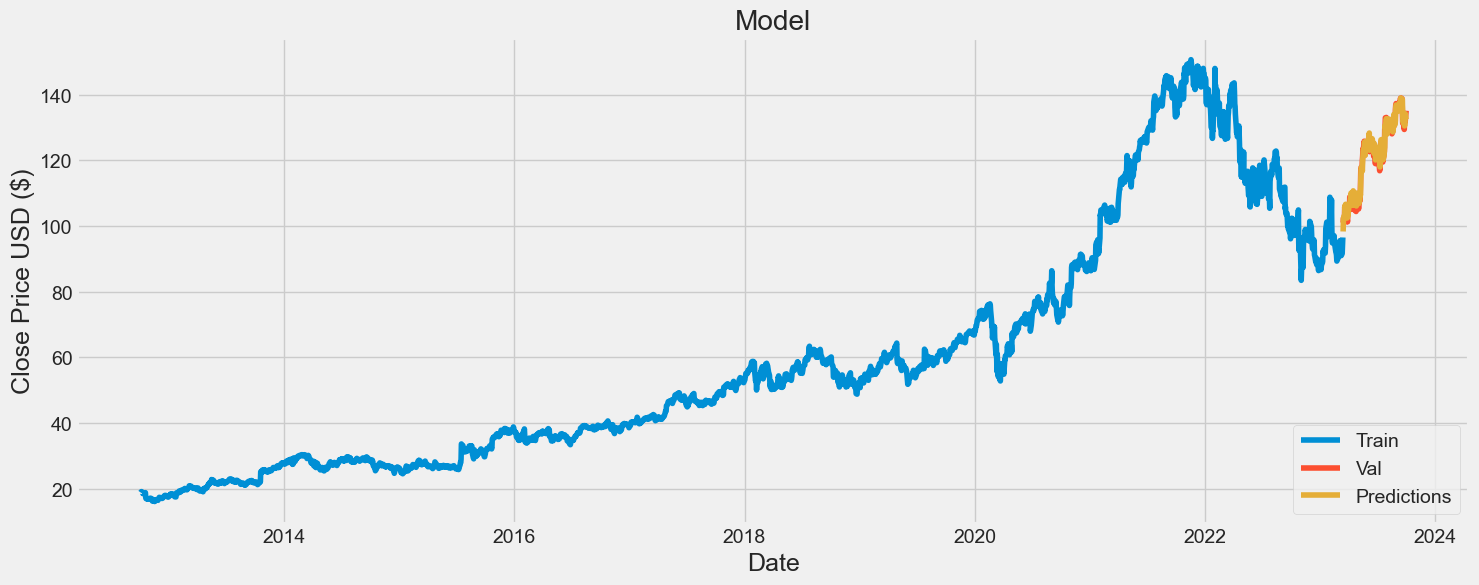

                 Close  Predictions
Date                               
2023-03-16  101.070000    98.367409
2023-03-17  102.459999   102.377335
2023-03-20  101.930000   103.328773
2023-03-21  105.839996   102.473007
2023-03-22  104.220001   106.217392
...                ...          ...
2023-09-26  129.449997   133.464752
2023-09-27  131.460007   130.530289
2023-09-28  133.130005   132.759216
2023-09-29  131.850006   134.263580
2023-10-02  135.169998   132.533508

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'GOOG'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


## 7) Hewlett Packard (HPQ)

[*********************100%%**********************]  1 of 1 completed
[array([0.0702813 , 0.04149448, 0.04188348, 0.03916041, 0.03565931,
       0.0344923 , 0.03202854, 0.03293625, 0.03501098, 0.035789  ,
       0.03708569, 0.03903075, 0.04006811, 0.03591865, 0.03890109,
       0.03306592, 0.03021317, 0.03215823, 0.0308615 , 0.02774945,
       0.02969447, 0.02658241, 0.02982417, 0.0348813 , 0.02567469,
       0.02736043, 0.02463736, 0.02204394, 0.01854283, 0.01854283,
       0.01776481, 0.01478241, 0.02061758, 0.        , 0.00298239,
       0.00946593, 0.01335602, 0.00842856, 0.01322636, 0.01530107,
       0.0165978 , 0.01504176, 0.02359998, 0.02736043, 0.02749009,
       0.02891647, 0.03176922, 0.03306592, 0.03656702, 0.036178  ,
       0.03941975, 0.03241756, 0.03656702, 0.03462196, 0.03527032,
       0.03410328, 0.02982417, 0.03125052, 0.03021317, 0.02554503])]
[0.03293624618740437]

[array([0.0702813 , 0.04149448, 0.04188348, 0.03916041, 0.03565931,
       0.0344923 , 0.03202854, 0.

2023-10-02 20:40:56.742594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:40:56.912258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:40:56.953341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:40:57.043869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:40:57.149633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 41s 15ms/step - loss: 0.0016
Epoch 2/5
2569/2569 [==============================] - 40s 16ms/step - loss: 5.6387e-04
Epoch 3/5
2569/2569 [==============================] - 39s 15ms/step - loss: 5.2152e-04
Epoch 4/5
2569/2569 [==============================] - 39s 15ms/step - loss: 4.3551e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 20:44:14.648177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:44:14.716695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:44:14.767428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step
RMSE: 0.5696494059351696


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/3987578260.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


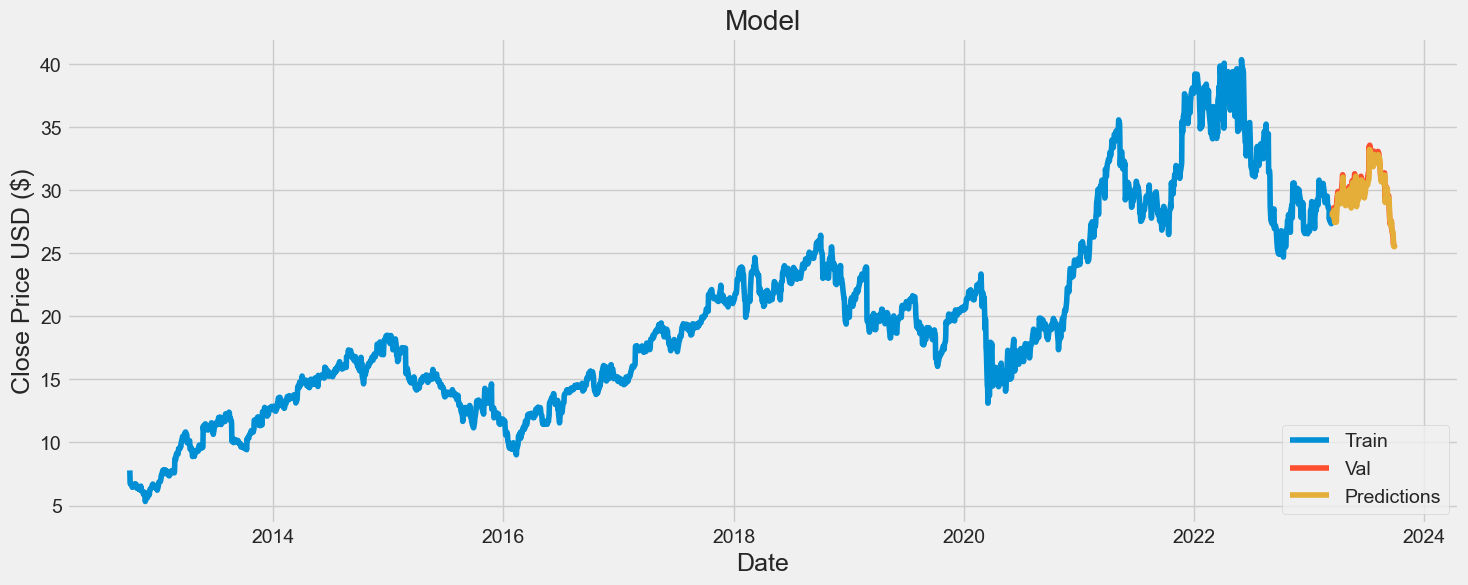

                Close  Predictions
Date                              
2023-03-16  28.309999    27.891127
2023-03-17  28.040001    28.210695
2023-03-20  28.190001    27.901339
2023-03-21  28.610001    27.972612
2023-03-22  27.850000    28.399893
...               ...          ...
2023-09-26  25.719999    26.216646
2023-09-27  25.639999    25.611736
2023-09-28  25.570000    25.522972
2023-09-29  25.700001    25.510714
2023-10-02  25.670000    25.666868

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'HPQ'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


## 8) IBM (IBM)

[*********************100%%**********************]  1 of 1 completed
[array([0.95075606, 0.95629186, 0.9553003 , 0.95695281, 0.95059069,
       0.93547056, 0.91754112, 0.91704541, 0.93390073, 0.94323714,
       0.96034039, 0.87465917, 0.82781125, 0.81459142, 0.82318432,
       0.7971577 , 0.79277869, 0.80004956, 0.81384778, 0.82425843,
       0.84590592, 0.81516982, 0.8210361 , 0.82872012, 0.79641406,
       0.78765592, 0.78385518, 0.78063285, 0.77294882, 0.7497315 ,
       0.75254068, 0.76154674, 0.78972159, 0.78021982, 0.78922575,
       0.81566553, 0.81062545, 0.79699246, 0.80318934, 0.79947116,
       0.78740813, 0.78253328, 0.78154172, 0.77567544, 0.78435103,
       0.80294142, 0.80847722, 0.82153181, 0.81120384, 0.8032719 ,
       0.80137159, 0.81673965, 0.83384289, 0.82880281, 0.82624142,
       0.81508713, 0.80665947, 0.80294142, 0.80922086, 0.78542514])]
[0.7996363973960715]

[array([0.95075606, 0.95629186, 0.9553003 , 0.95695281, 0.95059069,
       0.93547056, 0.91754112, 0.9

2023-10-02 20:44:16.371663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:44:16.550678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:44:16.600472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:44:16.694609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   3/2569 [..............................] - ETA: 1:21 - loss: 0.2106 

2023-10-02 20:44:16.825592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 41s 16ms/step - loss: 0.0020
Epoch 2/5
2569/2569 [==============================] - 41s 16ms/step - loss: 7.6795e-04
Epoch 3/5
2569/2569 [==============================] - 38s 15ms/step - loss: 6.5060e-04
Epoch 4/5
2569/2569 [==============================] - 39s 15ms/step - loss: 6.6380e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 20:47:34.203751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:47:34.270907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:47:34.319929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 16ms/step
RMSE: 2.60462688160813


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/2770320781.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


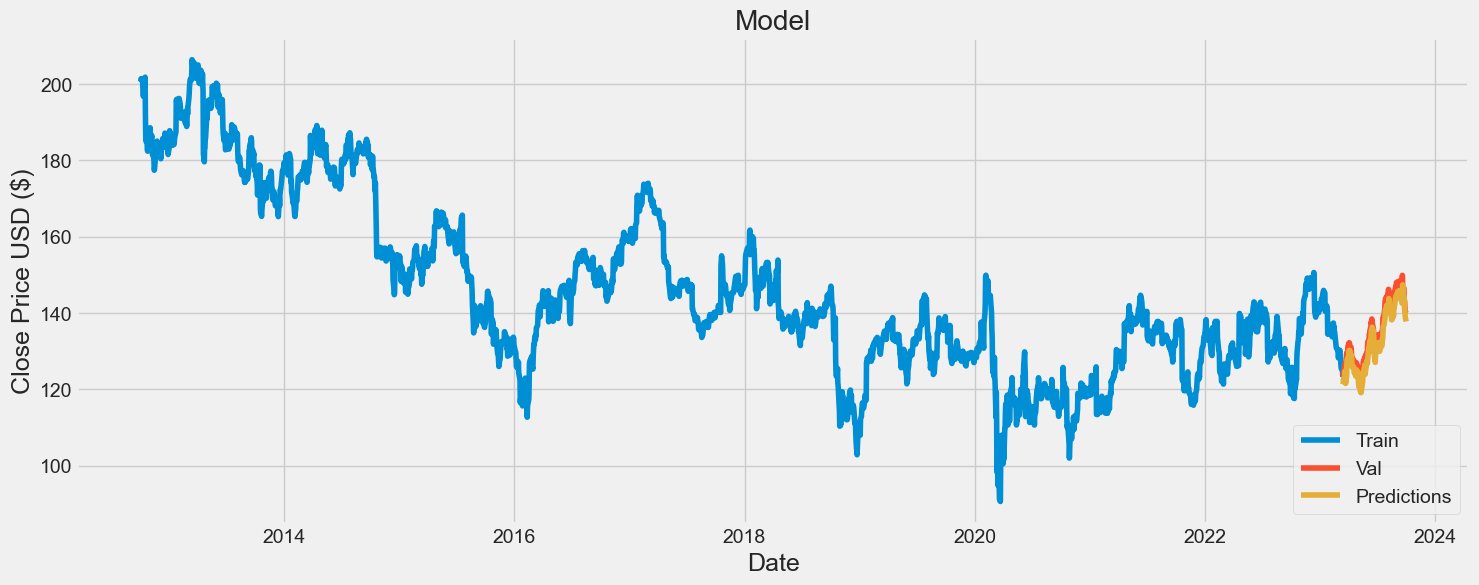

                 Close  Predictions
Date                               
2023-03-16  124.699997   121.327164
2023-03-17  123.690002   122.681267
2023-03-20  125.940002   121.831650
2023-03-21  126.570000   124.014702
2023-03-22  124.050003   124.783005
...                ...          ...
2023-09-26  143.240005   143.955399
2023-09-27  143.169998   140.672089
2023-09-28  141.580002   140.576477
2023-09-29  140.300003   138.984375
2023-10-02  140.800003   137.734512

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'IBM'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([0.34086851, 0.24470723, 0.24004323, 0.21959073, 0.2791531 ,
       0.25152495, 0.23645506, 0.31395759, 0.31216384, 0.13311812,
       0.09903086, 0.08970217, 0.12307152, 0.20667387, 0.06637941,
       0.06350915, 0.1112305 , 0.01435268, 0.11804822, 0.0509509 ,
       0.1112305 , 0.27090025, 0.26193017, 0.39612481, 0.42339434,
       0.47362734, 0.51309651, 0.58485783, 0.63150334, 0.59921051,
       0.54538934, 0.57768218, 0.65661984, 0.67097251, 0.67097251,
       0.710441  , 0.76426217, 0.73914567, 0.624327  , 0.66379618,
       0.75349834, 0.75349834, 0.60279868, 0.52027285, 0.55974133,
       0.53821301, 0.54897751, 0.4772155 , 0.58127035, 0.55974133,
       0.53462484, 0.53103667, 0.51094347, 0.40904167, 0.35880867,
       0.4054535 , 0.26551833, 0.34086851, 0.294223  , 0.38751334])]
[0.3946896743820627]

[array([0.34086851, 0.24470723, 0.24004323, 0.21959073, 0.2791531 ,
       0.25152495, 0.23645506, 0.3

2023-10-02 20:47:36.162796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:47:36.336710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:47:36.385575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:47:36.473679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  3/138 [..............................] - ETA: 3s - loss: 0.1359  

2023-10-02 20:47:36.593435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 4s 16ms/step - loss: 0.0291
Epoch 2/5
138/138 [==============================] - 2s 15ms/step - loss: 0.0165
Epoch 3/5
138/138 [==============================] - 2s 15ms/step - loss: 0.0122
Epoch 4/5
138/138 [==============================] - 2s 15ms/step - loss: 0.0110
Epoch 5/5
1/1 [==============================] - 0s 373ms/step


2023-10-02 20:47:47.398675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:47:47.467646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:47:47.517375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/305010821.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


RMSE: 0.2708329281413685


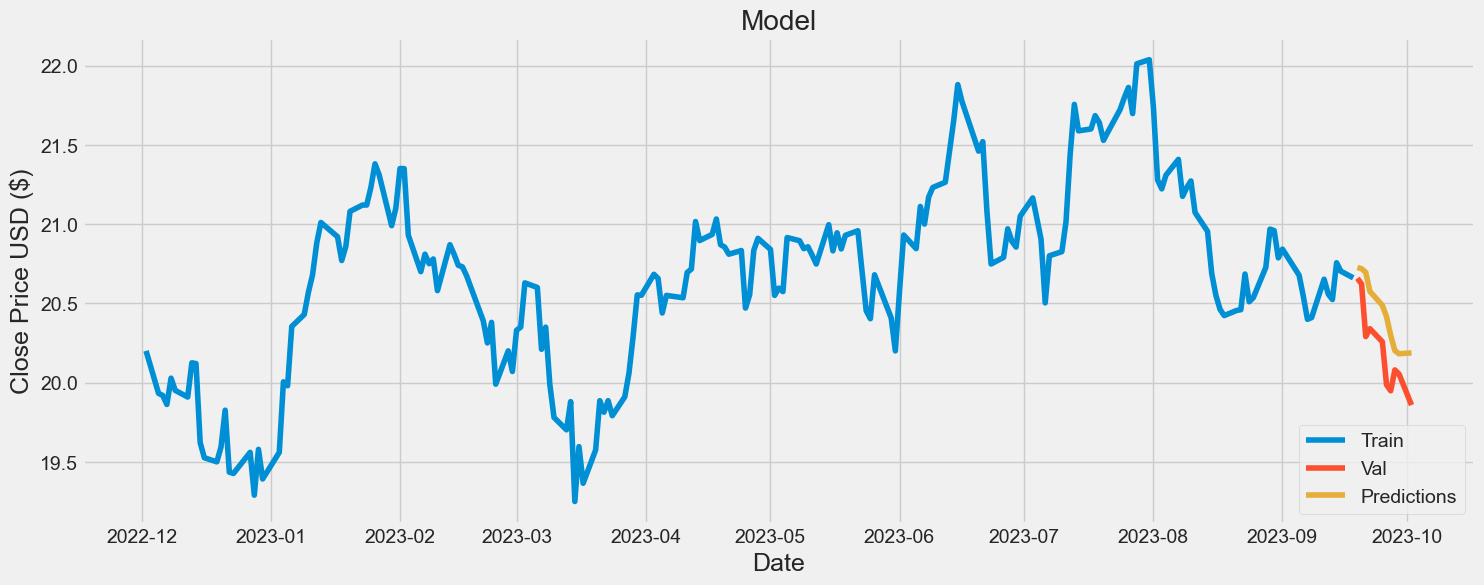

                Close  Predictions
Date                              
2023-09-19  20.658001    20.725866
2023-09-20  20.622000    20.718554
2023-09-21  20.290001    20.695734
2023-09-22  20.340000    20.575462
2023-09-25  20.257000    20.487398
2023-09-26  19.986000    20.415010
2023-09-27  19.948000    20.298214
2023-09-28  20.080000    20.201841
2023-09-29  20.054001    20.181921
2023-10-02  19.858000    20.187428


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'INTL'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([0.00432893, 0.00622677, 0.00624245, 0.00632087, 0.00545822,
       0.00434462, 0.00399956, 0.00396819, 0.00439167, 0.00473674,
       0.00580329, 0.0059915 , 0.00553665, 0.00428188, 0.0044701 ,
       0.00390546, 0.00393682, 0.00368587, 0.00360745, 0.00367019,
       0.0068071 , 0.00643066, 0.00603855, 0.00735605, 0.00539548,
       0.00428188, 0.00450147, 0.00354471, 0.00335649, 0.00216447,
       0.00263501, 0.00343491, 0.00291733, 0.00169393, 0.00230563,
       0.0032467 , 0.00210173, 0.00174099, 0.002337  , 0.00327807,
       0.00442304, 0.0036545 , 0.00412504, 0.00442304, 0.00414072,
       0.00387409, 0.00395251, 0.00525432, 0.00500337, 0.00465831,
       0.00484653, 0.00639929, 0.0077168 , 0.00790502, 0.00777954,
       0.00682278, 0.00658751, 0.00592876, 0.00509748, 0.00351334])]
[0.0037486071974701246]

[array([0.00432893, 0.00622677, 0.00624245, 0.00632087, 0.00545822,
       0.00434462, 0.00399956, 

2023-10-02 20:47:48.839492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:47:49.010956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:47:49.059643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:47:49.146056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   3/2569 [..............................] - ETA: 1:22 - loss: 0.0368 

2023-10-02 20:47:49.266333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 41s 15ms/step - loss: 0.0013
Epoch 2/5
2569/2569 [==============================] - 39s 15ms/step - loss: 5.3267e-04
Epoch 3/5
2569/2569 [==============================] - 39s 15ms/step - loss: 3.3406e-04
Epoch 4/5
2569/2569 [==============================] - 38s 15ms/step - loss: 3.6165e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 20:51:04.899249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:51:04.968001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:51:05.015330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step
RMSE: 8.378665005684443


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/1062486219.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


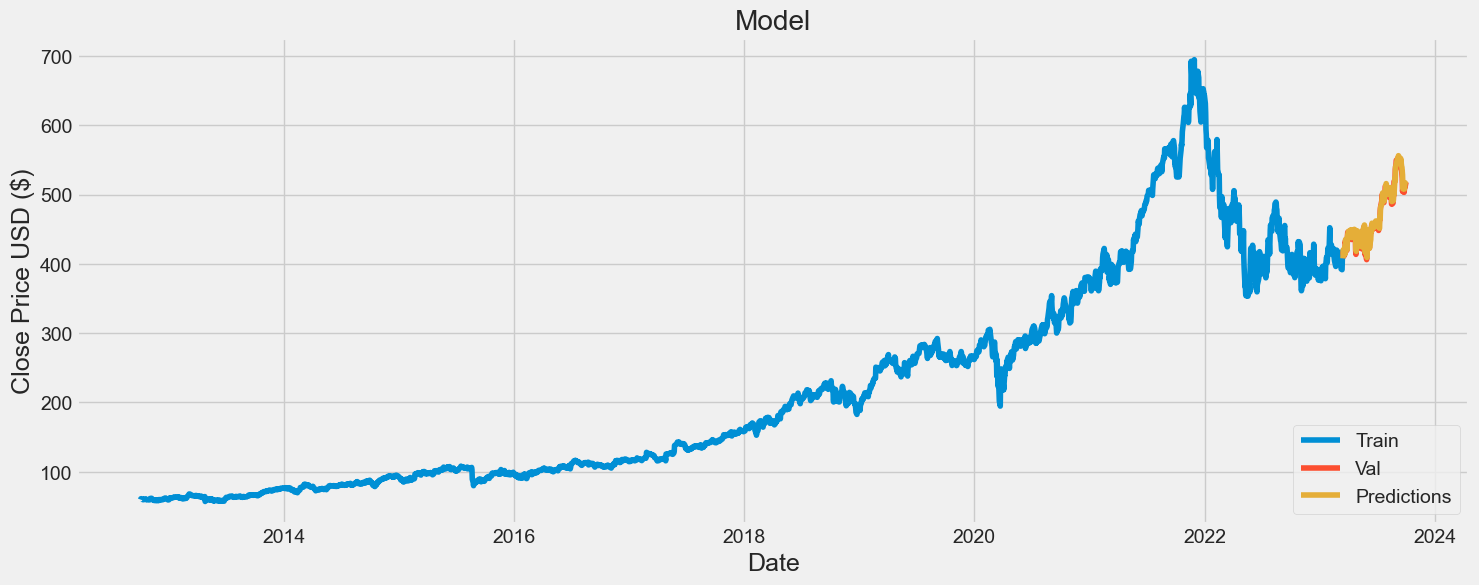

                 Close  Predictions
Date                               
2023-03-16  418.149994   407.965118
2023-03-17  413.690002   420.521179
2023-03-20  411.839996   414.651184
2023-03-21  422.029999   413.527344
2023-03-22  414.209991   424.310974
...                ...          ...
2023-09-26  503.190002   513.734070
2023-09-27  508.239990   508.068542
2023-09-28  512.239990   513.939941
2023-09-29  510.940002   517.053406
2023-10-02  517.799988   514.938232

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'INTU'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([1.        , 0.86799433, 0.86742533, 0.8820768 , 0.9105263 ,
       0.9453769 , 0.88534854, 0.84566148, 0.74153625, 0.75419627,
       0.7383357 , 0.68449502, 0.68648648, 0.73285914, 0.71650071,
       0.75320054, 0.74338548, 0.70881933, 0.68776671, 0.70056901,
       0.7482219 , 0.73698433, 0.72204836, 0.76116642, 0.77553339,
       0.7479374 , 0.73044096, 0.63897581, 0.671266  , 0.61308677,
       0.57126602, 0.60497866, 0.65504979, 0.67724037, 0.6514936 ,
       0.6634424 , 0.67596014, 0.70967284, 0.71294452, 0.6985775 ,
       0.69559031, 0.6866287 , 0.66628736, 0.70597437, 0.73328592,
       0.72802272, 0.78264577, 0.76301565, 0.72930295, 0.69374108,
       0.71237552, 0.71721194, 0.75704123, 0.75348504, 0.79103838,
       0.80241822, 0.79032715, 0.78022759, 0.80042676, 0.79331433])]
[0.7972973005970815]

[array([1.        , 0.86799433, 0.86742533, 0.8820768 , 0.9105263 ,
       0.9453769 , 0.88534854, 0.8

2023-10-02 20:51:06.406404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:51:06.577472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:51:06.623591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:51:06.707249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   3/1020 [..............................] - ETA: 29s - loss: 0.2199  

2023-10-02 20:51:06.824896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1020/1020 [==============================] - 17s 16ms/step - loss: 0.0040
Epoch 2/5
1020/1020 [==============================] - 16s 16ms/step - loss: 0.0015
Epoch 3/5
1020/1020 [==============================] - 148s 146ms/step - loss: 0.0010
Epoch 4/5
1020/1020 [==============================] - 16s 15ms/step - loss: 7.4958e-04
Epoch 5/5
2/2 [==============================] - 0s 33ms/step


2023-10-02 20:54:38.848228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:54:38.917564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:54:38.956093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


RMSE: 0.4946896567326289


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/1051021332.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


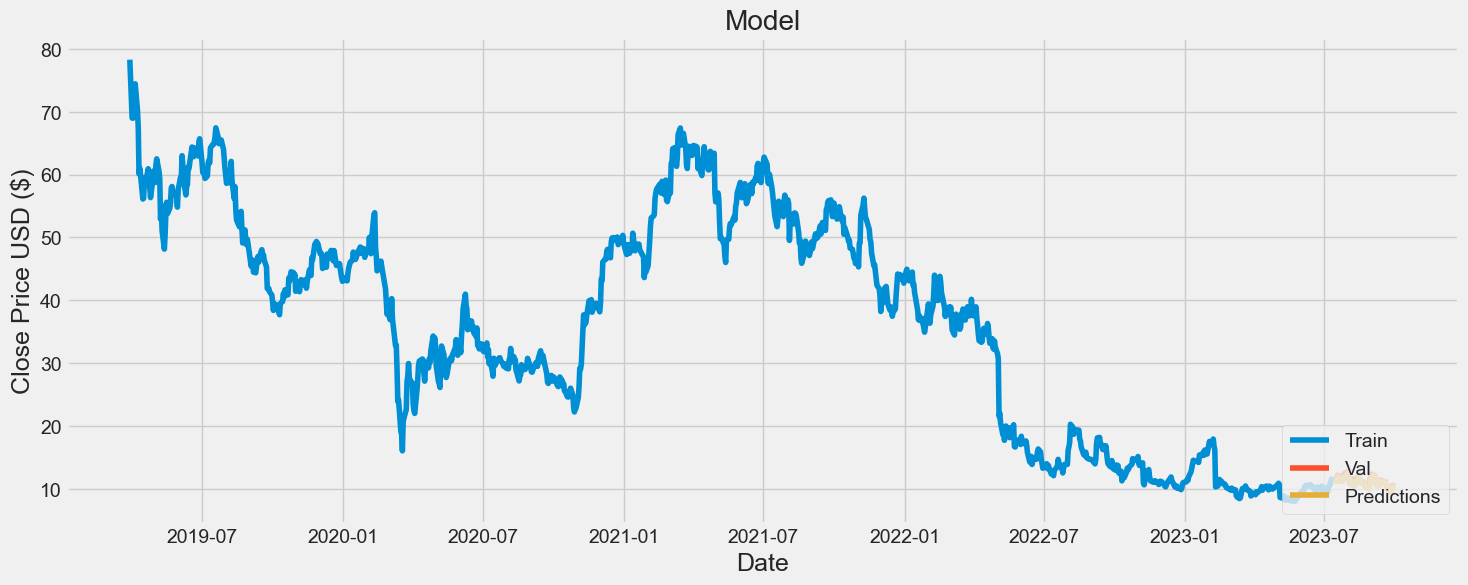

            Close  Predictions
Date                          
2023-07-14  11.30    11.459469
2023-07-17  11.48    11.184626
2023-07-18  11.77    11.189636
2023-07-19  12.18    11.448742
2023-07-20  11.42    11.883616
2023-07-21  11.42    11.406318
2023-07-24  11.67    11.145295
2023-07-25  11.56    11.296852
2023-07-26  12.20    11.316081
2023-07-27  11.95    11.835096
2023-07-28  12.48    11.843100
2023-07-31  12.71    12.201730
2023-08-01  12.23    12.513313
2023-08-02  11.71    12.182548
2023-08-03  11.51    11.567313
2023-08-04  10.85    11.189908
2023-08-07  10.97    10.600665
2023-08-08  11.56    10.542196
2023-08-09  10.40    11.114906
2023-08-10  11.04    10.463178
2023-08-11  11.38    10.655970
2023-08-14  11.64    11.103711
2023-08-15  12.08    11.483049
2023-08-16  11.36    11.926722
2023-08-17  11.06    11.448802
2023-08-18  11.13    10.925112
2023-08-21  11.10    10.810495
2023-08-22  10.81    10.815943
2023-08-23  10.72    10.620223
2023-08-24  10.58    10.484326
2023-08-

/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'LYFT'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([9.05837274e-03, 7.84691750e-03, 8.17731629e-03, 5.31387759e-03,
       3.90969191e-03, 3.44163002e-03, 1.81718023e-03, 2.12004535e-03,
       1.48678669e-03, 1.48678669e-03, 1.37665201e-03, 2.47797256e-03,
       0.00000000e+00, 5.50673407e-05, 9.36123786e-04, 1.43171935e-03,
       1.17015421e-02, 9.85682817e-03, 8.14978262e-03, 5.86454050e-03,
       6.13986670e-03, 6.05727094e-03, 6.25000138e-03, 6.02973727e-03,
       4.10242235e-03, 2.78083769e-03, 6.33258664e-04, 3.00110180e-03,
       2.42291048e-03, 9.30617052e-03, 8.78304128e-03, 1.26101322e-02,
       1.08480193e-02, 1.13436149e-02, 1.47026439e-02, 1.38215874e-02,
       1.91629987e-02, 1.97411900e-02, 2.03193866e-02, 2.29625559e-02,
       2.48348035e-02, 2.21916342e-02, 2.33480168e-02, 2.40363428e-02,
       2.19988985e-02, 2.34306178e-02, 2.43942753e-02, 2.47797362e-02,
       2.36784156e-02, 2.54955958e-02, 2.15583702e-02, 2.13931735e-02,
       

2023-10-02 20:54:40.364337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:54:40.535239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:54:40.573873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:54:40.658568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:54:40.759273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 40s 15ms/step - loss: 0.0016
Epoch 2/5
2569/2569 [==============================] - 40s 15ms/step - loss: 5.7164e-04
Epoch 3/5
2569/2569 [==============================] - 118s 46ms/step - loss: 4.8228e-04
Epoch 4/5
2569/2569 [==============================] - 39s 15ms/step - loss: 4.4976e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 20:59:15.955477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:59:16.023561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:59:16.071419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 14ms/step
RMSE: 7.770965166625742


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/3751737297.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


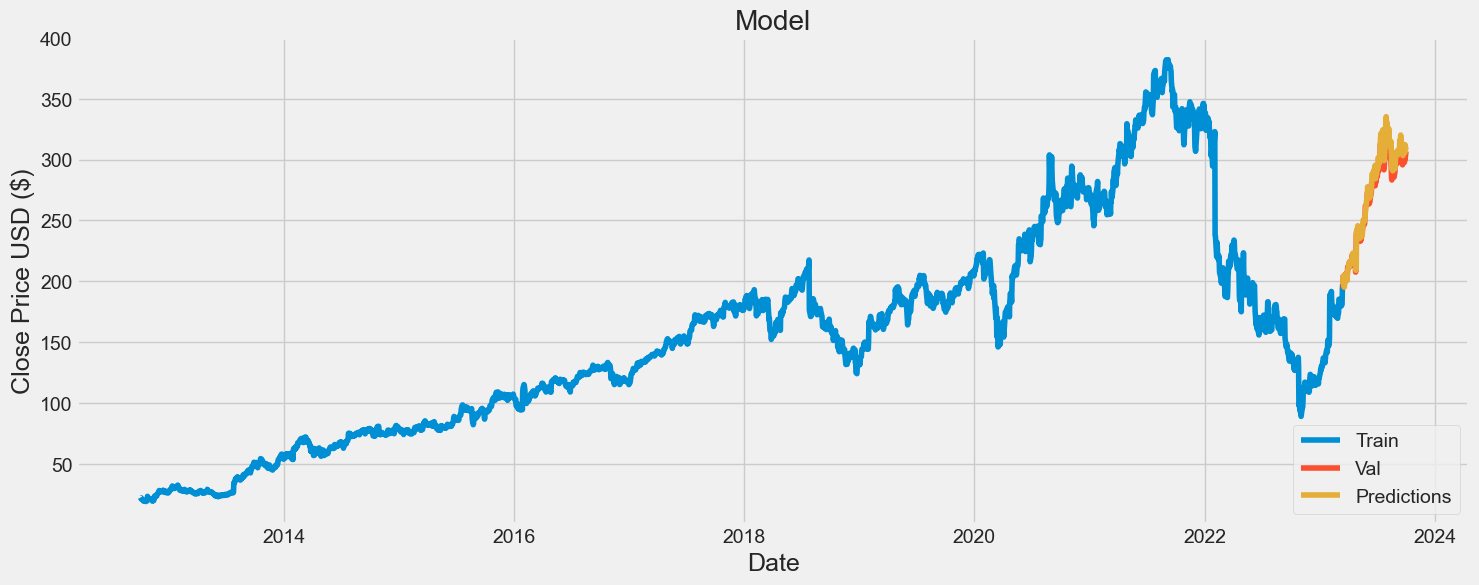

                 Close  Predictions
Date                               
2023-03-16  204.929993   197.407745
2023-03-17  195.610001   204.577835
2023-03-20  197.809998   195.178482
2023-03-21  202.160004   196.907089
2023-03-22  199.809998   201.765503
...                ...          ...
2023-09-26  298.959991   309.091309
2023-09-27  297.739990   306.884125
2023-09-28  303.959991   305.520599
2023-09-29  300.209991   312.323730
2023-10-02  306.820007   307.984680

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'META'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([0.00987632, 0.0104767 , 0.01098703, 0.01044668, 0.01023655,
       0.00873559, 0.00783501, 0.00774496, 0.00849544, 0.00942603,
       0.00936599, 0.00966618, 0.00939601, 0.00681436, 0.00489313,
       0.00504322, 0.00459294, 0.0045329 , 0.00552353, 0.00651417,
       0.00945605, 0.00939601, 0.00978626, 0.0104767 , 0.0081352 ,
       0.00732468, 0.00738472, 0.00555355, 0.00216138, 0.0014109 ,
       0.00087055, 0.00045029, 0.00108069, 0.00102065, 0.00174111,
       0.00399256, 0.00306196, 0.00213136, 0.0029719 , 0.00174111,
       0.00075048, 0.00018011, 0.        , 0.00090057, 0.00108069,
       0.00027017, 0.00171109, 0.00285182, 0.00261167, 0.00222142,
       0.00132084, 0.0021914 , 0.00357228, 0.0028218 , 0.00393252,
       0.00324207, 0.00207132, 0.00147094, 0.00177113, 0.00054034])]
[0.001020647982898304]

[array([0.00987632, 0.0104767 , 0.01098703, 0.01044668, 0.01023655,
       0.00873559, 0.00783501, 0

2023-10-02 20:59:17.859347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:59:18.067497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:59:18.106088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 20:59:18.182657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   3/2569 [..............................] - ETA: 1:20 - loss: 0.0033       

2023-10-02 20:59:18.274385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 41s 15ms/step - loss: 0.0011
Epoch 2/5
2569/2569 [==============================] - 38s 15ms/step - loss: 4.8164e-04
Epoch 3/5
2569/2569 [==============================] - 39s 15ms/step - loss: 3.9889e-04
Epoch 4/5
2569/2569 [==============================] - 38s 15ms/step - loss: 3.7481e-04
Epoch 5/5
2569/2569 [==============================] - 39s 15ms/step - loss: 2.9964e-04


2023-10-02 21:02:31.426721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:02:31.497939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:02:31.559401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 13ms/step
RMSE: 4.845591548146192


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/1844402041.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


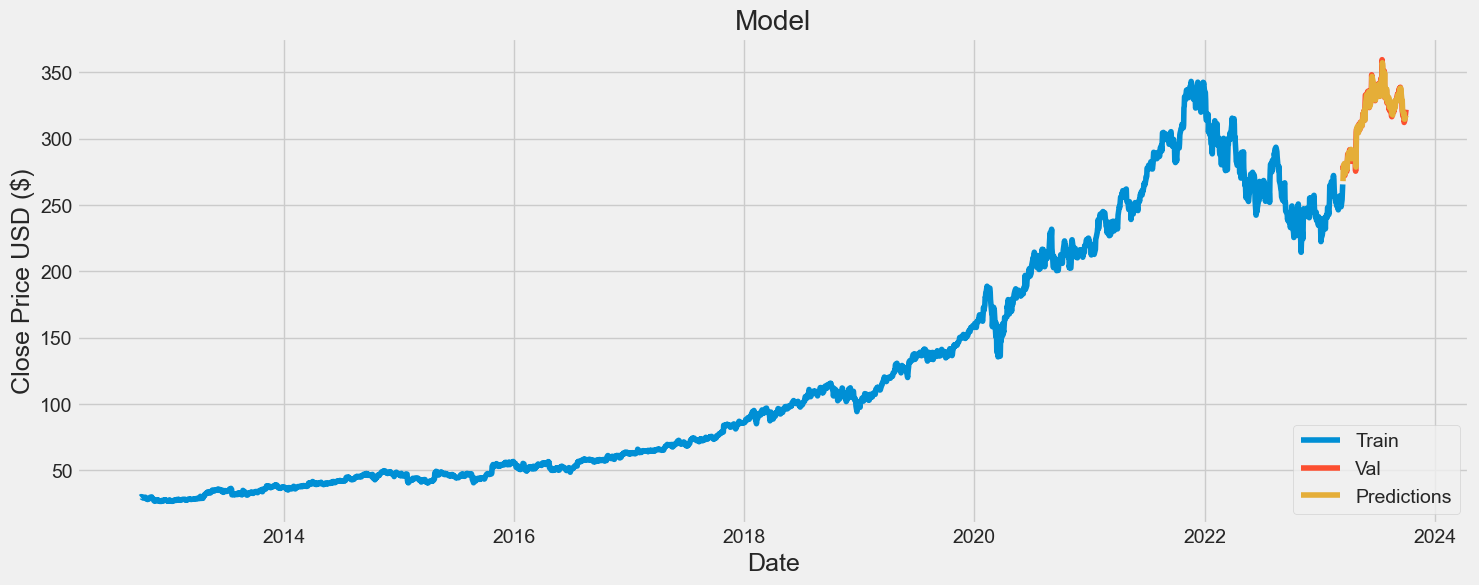

                 Close  Predictions
Date                               
2023-03-16  276.200012   267.894928
2023-03-17  279.429993   277.339050
2023-03-20  272.230011   281.142578
2023-03-21  273.779999   274.662109
2023-03-22  272.290009   274.279388
...                ...          ...
2023-09-26  312.140015   319.071442
2023-09-27  312.790009   314.653809
2023-09-28  313.640015   314.580170
2023-09-29  315.750000   315.584320
2023-10-02  321.799988   317.608826

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'MSFT'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([0.        , 0.0012789 , 0.00213359, 0.0021106 , 0.00356503,
       0.00189536, 0.00188909, 0.0019894 , 0.0016446 , 0.00173445,
       0.00200402, 0.00252018, 0.00227778, 0.00178043, 0.00238644,
       0.00245749, 0.00076483, 0.0010553 , 0.00274169, 0.00476034,
       0.00443644, 0.00427135, 0.00455137, 0.0041606 , 0.00443435,
       0.00407701, 0.00448032, 0.00454092, 0.00483766, 0.00487319,
       0.00522844, 0.00510723, 0.00520336, 0.00542069, 0.00554607,
       0.00553562, 0.00534964, 0.00556279, 0.00538516, 0.00520754,
       0.0052765 , 0.00408328, 0.00630881, 0.00562339, 0.00620851,
       0.0061688 , 0.00592222, 0.0061897 , 0.00716141, 0.00754383,
       0.00769846, 0.00799102, 0.00818746, 0.00784056, 0.00774026,
       0.00728888, 0.00705693, 0.00714469, 0.00711335, 0.00686885])]
[0.007550096583157386]

[array([0.        , 0.0012789 , 0.00213359, 0.0021106 , 0.00356503,
       0.00189536, 0.00188909, 0

2023-10-02 21:02:32.965178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:02:33.135666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:02:33.194044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:02:33.306199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   2/2569 [..............................] - ETA: 2:22 - loss: 0.0486 

2023-10-02 21:02:33.444696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 40s 15ms/step - loss: 0.0012
Epoch 2/5
2569/2569 [==============================] - 61s 24ms/step - loss: 5.0719e-04
Epoch 3/5
2569/2569 [==============================] - 40s 15ms/step - loss: 4.2606e-04
Epoch 4/5
2569/2569 [==============================] - 38s 15ms/step - loss: 3.6160e-04
Epoch 5/5
2569/2569 [==============================] - 39s 15ms/step - loss: 3.4755e-04


2023-10-02 21:06:10.803937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:06:10.871621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:06:10.934761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 19ms/step
RMSE: 12.518334218828342


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/1025152849.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


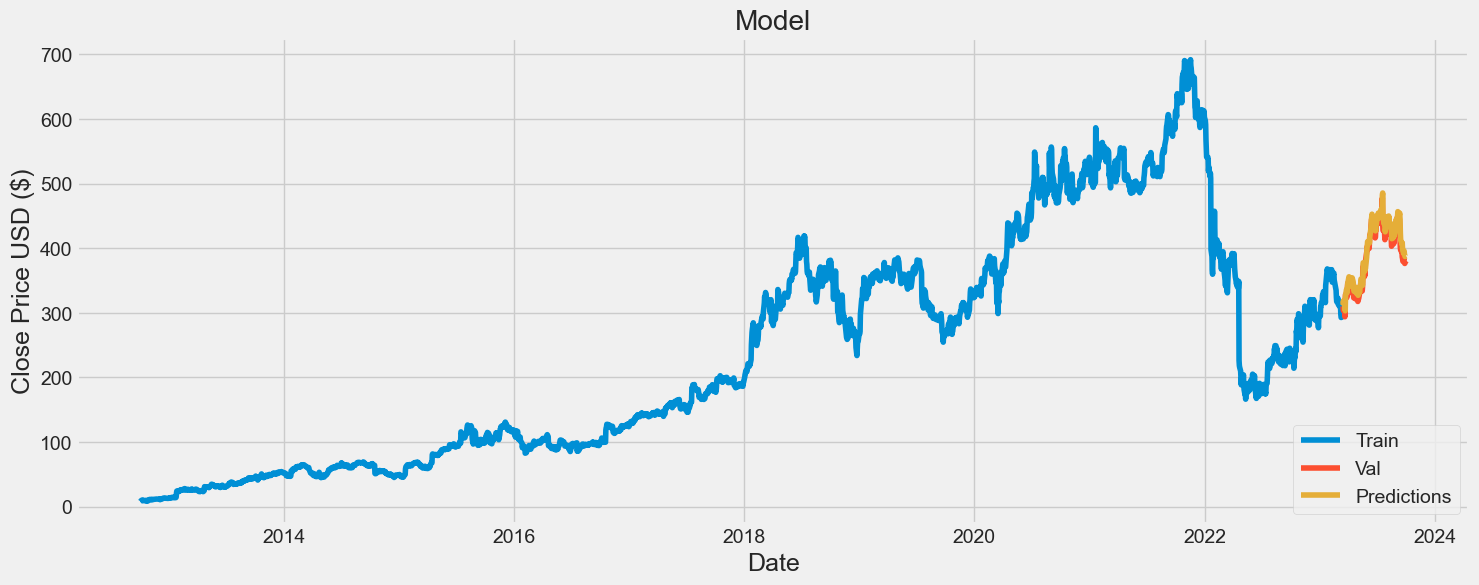

                 Close  Predictions
Date                               
2023-03-16  310.059998   312.252411
2023-03-17  303.500000   318.413910
2023-03-20  305.130005   312.571320
2023-03-21  305.790009   313.138092
2023-03-22  293.899994   313.876984
...                ...          ...
2023-09-26  379.250000   395.697693
2023-09-27  377.589996   390.719940
2023-09-28  376.359985   388.546753
2023-09-29  377.600006   387.123413
2023-10-02  380.329987   388.046387

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'NFLX'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([9.11953213e-04, 8.45721915e-04, 1.14121510e-03, 9.78184512e-04,
       9.11953213e-04, 7.69301447e-04, 6.57217674e-04, 6.92880494e-04,
       6.36838850e-04, 7.18354145e-04, 9.06858386e-04, 8.55911570e-04,
       7.54016965e-04, 3.71913655e-04, 3.00588015e-04, 4.83997429e-04,
       4.02482134e-04, 4.07576961e-04, 3.41345662e-04, 3.05682356e-04,
       5.96081202e-04, 5.65512724e-04, 8.35532746e-04, 8.30437918e-04,
       6.26649195e-04, 6.62312501e-04, 4.12671303e-04, 2.75114364e-04,
       2.29261889e-04, 8.15152950e-05, 1.06988946e-04, 0.00000000e+00,
       1.63030590e-04, 5.60416439e-05, 2.24167061e-04, 2.64924709e-04,
       3.71913655e-04, 3.97387306e-04, 4.48334609e-04, 3.36250835e-04,
       3.00588015e-04, 1.88504241e-04, 3.66819314e-04, 2.95493187e-04,
       3.05682356e-04, 2.95493187e-04, 4.99281425e-04, 6.47028019e-04,
       5.80797206e-04, 5.85891547e-04, 6.16460026e-04, 5.90986375e-04,
       

2023-10-02 21:06:12.415970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:06:12.586373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:06:12.635587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:06:12.733510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   1/2569 [..............................] - ETA: 55:36 - loss: 0.0141

2023-10-02 21:06:12.895673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 46s 17ms/step - loss: 7.3331e-04
Epoch 2/5
2569/2569 [==============================] - 40s 16ms/step - loss: 2.4983e-04
Epoch 3/5
2569/2569 [==============================] - 39s 15ms/step - loss: 2.7463e-04
Epoch 4/5
2569/2569 [==============================] - 39s 15ms/step - loss: 1.9460e-04
Epoch 5/5
2569/2569 [==============================] - 39s 15ms/step - loss: 1.6656e-04


2023-10-02 21:09:33.746101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:09:33.814462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:09:33.879920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 19ms/step
RMSE: 28.441937266849838


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/1946296880.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


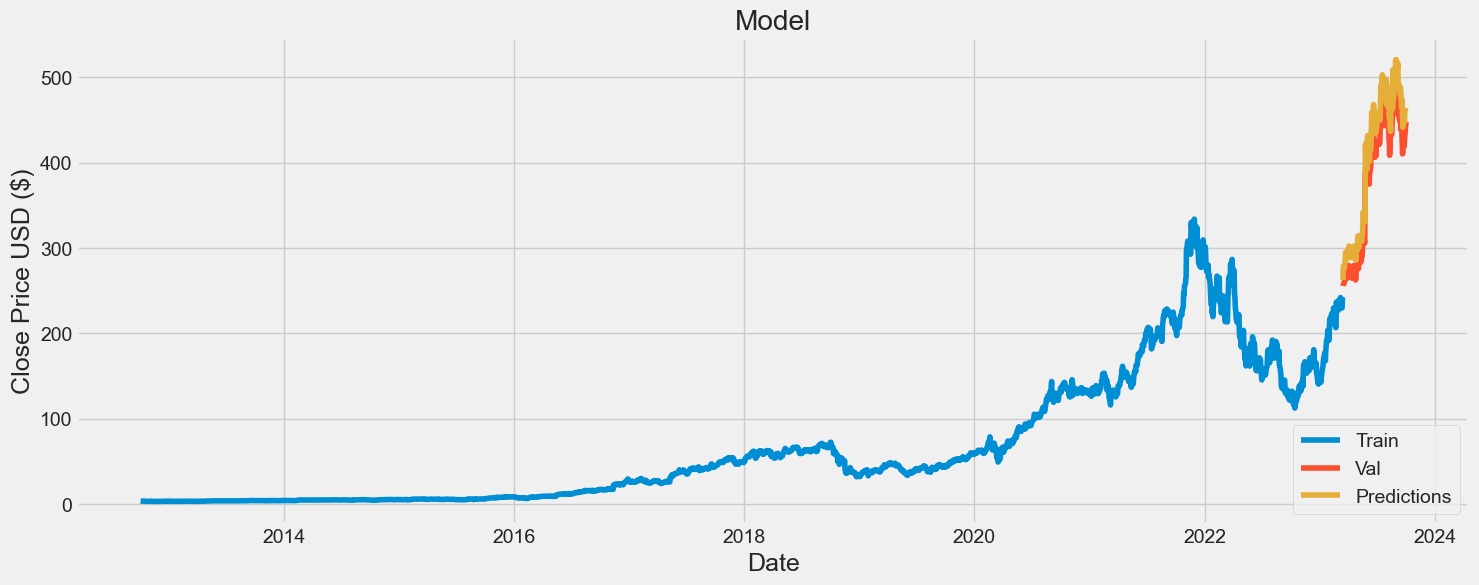

                 Close  Predictions
Date                               
2023-03-16  255.410004   262.307159
2023-03-17  257.250000   278.453827
2023-03-20  259.000000   276.233185
2023-03-21  261.989990   279.931885
2023-03-22  264.679993   283.440308
...                ...          ...
2023-09-26  419.109985   454.070526
2023-09-27  424.679993   448.012573
2023-09-28  430.890015   457.009430
2023-09-29  434.989990   461.101898
2023-10-02  447.820007   464.344482

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'NVDA'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([0.02131164, 0.02306187, 0.02388551, 0.01863481, 0.01647277,
       0.01101616, 0.01029548, 0.01173684, 0.01461958, 0.01770822,
       0.02357666, 0.01698754, 0.01585505, 0.00926593, 0.01256048,
       0.01039844, 0.01050139, 0.01317822, 0.01451663, 0.01544322,
       0.01956141, 0.01678162, 0.01719345, 0.02110573, 0.01245754,
       0.00864821, 0.00792752, 0.00741274, 0.00453002, 0.        ,
       0.00380934, 0.0043241 , 0.00576546, 0.00638321, 0.00844229,
       0.01379595, 0.01420775, 0.01688458, 0.02285596, 0.02326779,
       0.02676825, 0.02810668, 0.02882736, 0.02491506, 0.02522392,
       0.02409143, 0.02563574, 0.02841553, 0.02429734, 0.02089983,
       0.02450323, 0.02820961, 0.0339751 , 0.04643262, 0.04488828,
       0.04303509, 0.04149079, 0.04149079, 0.03799033, 0.03541646])]
[0.038505094238988236]

[array([0.02131164, 0.02306187, 0.02388551, 0.01863481, 0.01647277,
       0.01101616, 0.01029548, 0

2023-10-02 21:09:35.364927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:09:35.538273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:09:35.586220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:09:35.693477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   2/2569 [..............................] - ETA: 2:17 - loss: 0.1263 

2023-10-02 21:09:35.813206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 40s 15ms/step - loss: 8.5209e-04
Epoch 2/5
2569/2569 [==============================] - 40s 15ms/step - loss: 3.5682e-04
Epoch 3/5
2569/2569 [==============================] - 40s 15ms/step - loss: 2.7464e-04
Epoch 4/5
2569/2569 [==============================] - 40s 16ms/step - loss: 2.4124e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 21:12:55.094281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:12:55.163006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:12:55.204632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 19ms/step
RMSE: 3.8160068843883117


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/2038327139.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


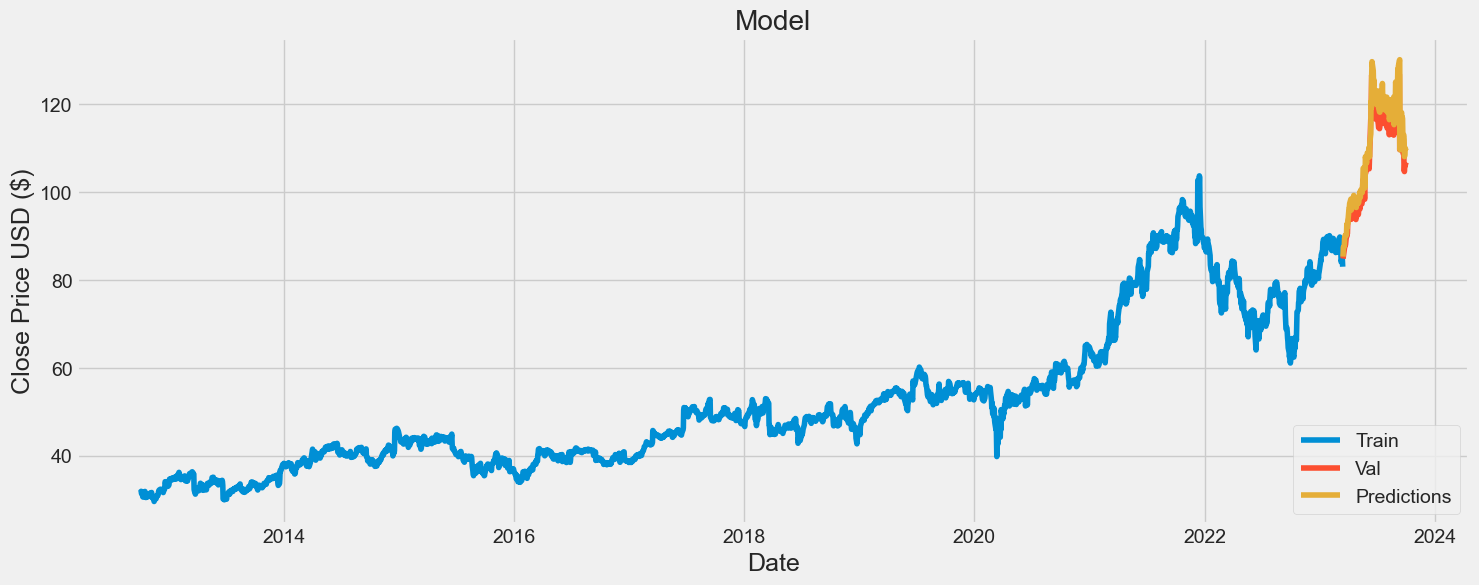

                 Close  Predictions
Date                               
2023-03-16   84.820000    85.278908
2023-03-17   85.260002    87.401154
2023-03-20   86.959999    87.593971
2023-03-21   87.580002    89.422180
2023-03-22   87.900002    89.846146
...                ...          ...
2023-09-26  104.879997   111.816109
2023-09-27  104.620003   108.008415
2023-09-28  106.150002   108.449875
2023-09-29  105.919998   110.005600
2023-10-02  106.709999   109.354584

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'ORCL'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([0.02187837, 0.02155452, 0.01464556, 0.01392588, 0.01460957,
       0.02213026, 0.02267003, 0.0247571 , 0.02878734, 0.02792371,
       0.03540843, 0.03137819, 0.02792371, 0.0229579 , 0.02292192,
       0.02072688, 0.02508096, 0.02634042, 0.02813962, 0.02903923,
       0.03152213, 0.02993883, 0.03109032, 0.02957898, 0.03058655,
       0.03029867, 0.02957898, 0.02720403, 0.02515293, 0.02702411,
       0.02914718, 0.02648436, 0.02360561, 0.01925153, 0.01302627,
       0.01122706, 0.00744873, 0.00913997, 0.01435768, 0.01586902,
       0.01572508, 0.01129903, 0.01597697, 0.0168406 , 0.01317021,
       0.01464556, 0.01345808, 0.01018352, 0.01050738, 0.01129903,
       0.01140698, 0.01129903, 0.00967974, 0.00824037, 0.01302627,
       0.00978769, 0.01270241, 0.01180281, 0.01129903, 0.00582944])]
[0.0]

[array([0.02187837, 0.02155452, 0.01464556, 0.01392588, 0.01460957,
       0.02213026, 0.02267003, 0.0247571 , 0.0287

2023-10-02 21:12:56.617827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:12:56.789887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:12:56.830673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:12:56.950211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   1/1913 [..............................] - ETA: 40:30 - loss: 0.0328

2023-10-02 21:12:57.062118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1913/1913 [==============================] - 30s 15ms/step - loss: 0.0019
Epoch 2/5
1913/1913 [==============================] - 41s 21ms/step - loss: 8.3569e-04
Epoch 3/5
1913/1913 [==============================] - 29s 15ms/step - loss: 7.7316e-04
Epoch 4/5
1913/1913 [==============================] - 29s 15ms/step - loss: 3.8582e-04
Epoch 5/5
1/4 [======>.......................] - ETA: 1s

2023-10-02 21:15:34.381723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:15:34.450129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:15:34.491907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 129ms/step
RMSE: 1.9587420014603945


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/608055231.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


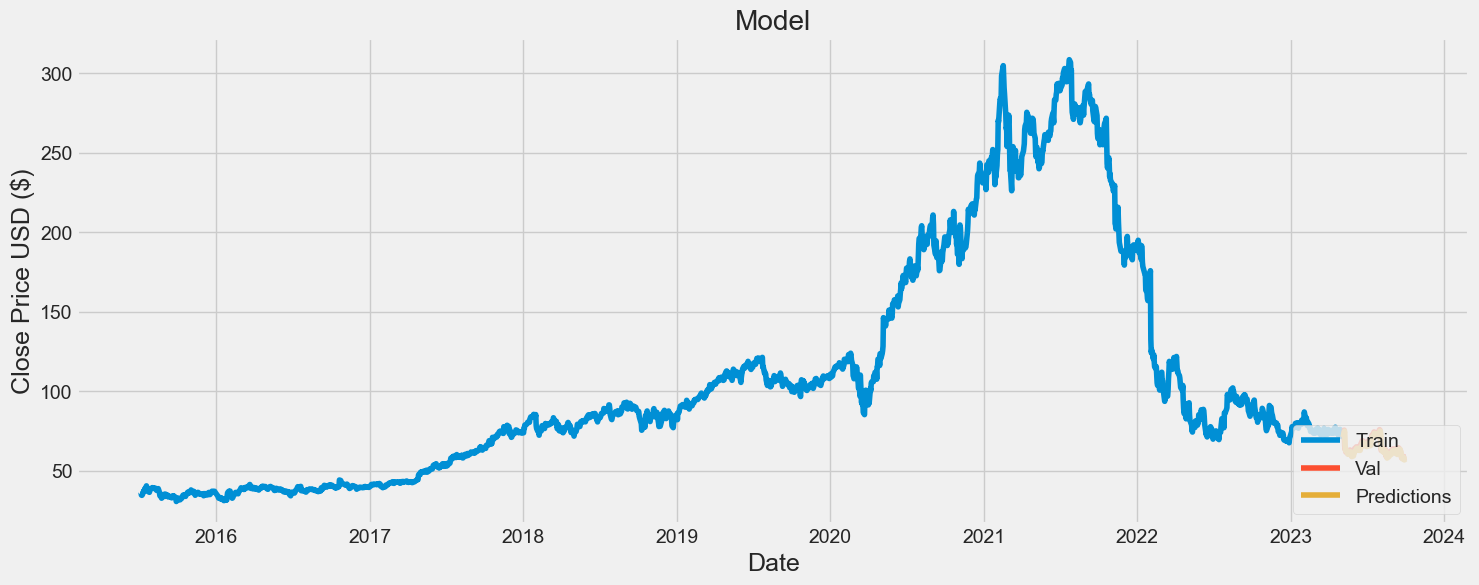

                Close  Predictions
Date                              
2023-05-05  74.970001    71.050201
2023-05-08  75.519997    73.935394
2023-05-09  65.904999    74.833115
2023-05-10  63.380001    66.444382
2023-05-11  64.180000    62.875561
...               ...          ...
2023-09-26  58.930000    57.992756
2023-09-27  57.340000    58.195644
2023-09-28  58.180000    56.786255
2023-09-29  58.459999    57.218914
2023-10-02  58.560001    57.581097

[103 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'PYPL'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([0.12869055, 0.13060416, 0.13456809, 0.13449973, 0.12602517,
       0.11912247, 0.11495352, 0.11105796, 0.10887097, 0.11160471,
       0.11891745, 0.12315473, 0.11618371, 0.10791417, 0.10743577,
       0.10490707, 0.10025972, 0.09889285, 0.10989613, 0.10695736,
       0.11461181, 0.11167305, 0.11939585, 0.11898578, 0.10360853,
       0.12103608, 0.1275287 , 0.1275287 , 0.13101423, 0.12828048,
       0.12520503, 0.12964736, 0.13074085, 0.13108256, 0.13108256,
       0.13784856, 0.13347459, 0.13190267, 0.13456809, 0.1393521 ,
       0.14119737, 0.13948879, 0.14017224, 0.14126573, 0.14516128,
       0.14283763, 0.14331603, 0.14618644, 0.14030893, 0.13531984,
       0.11529526, 0.13039914, 0.13942046, 0.13388464, 0.13600329,
       0.12746037, 0.12944234, 0.12732368, 0.12677692, 0.12083106])]
[0.12916895547634055]

[array([0.12869055, 0.13060416, 0.13456809, 0.13449973, 0.12602517,
       0.11912247, 0.11495352, 0.

2023-10-02 21:15:37.013275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:15:37.186338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:15:37.249905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:15:37.352436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   3/2569 [..............................] - ETA: 1:26 - loss: 0.3111 

2023-10-02 21:15:37.512027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 41s 15ms/step - loss: 0.0019
Epoch 2/5
2569/2569 [==============================] - 46s 18ms/step - loss: 7.1828e-04
Epoch 3/5
2569/2569 [==============================] - 40s 16ms/step - loss: 5.9841e-04
Epoch 4/5
2569/2569 [==============================] - 39s 15ms/step - loss: 5.5728e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 21:19:00.847319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:19:00.915550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:19:00.964212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 23ms/step
RMSE: 6.700789009034649


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/383866987.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


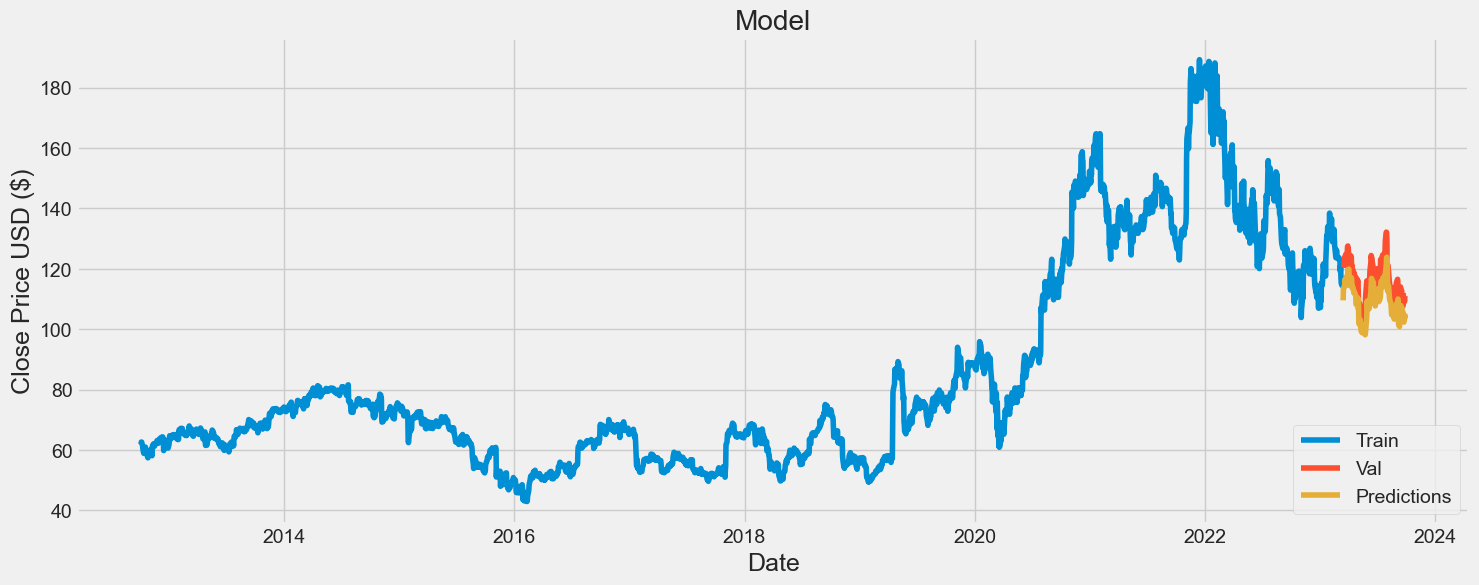

                 Close  Predictions
Date                               
2023-03-16  120.510002   109.568893
2023-03-17  120.730003   113.573494
2023-03-20  121.820000   114.018158
2023-03-21  123.800003   114.833351
2023-03-22  121.970001   116.486786
...                ...          ...
2023-09-26  109.720001   104.638565
2023-09-27  109.190002   104.236946
2023-09-28  111.099998   103.684021
2023-09-29  111.059998   105.196594
2023-10-02  111.099998   105.300858

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'QCOM'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([0.01866174, 0.01899799, 0.01773705, 0.01992266, 0.0191661 ,
       0.01580363, 0.01462676, 0.01521519, 0.0145427 , 0.01731674,
       0.01992266, 0.02185608, 0.02286483, 0.02118359, 0.02286483,
       0.02067922, 0.02009079, 0.01908204, 0.01866174, 0.01773705,
       0.01840955, 0.01429052, 0.01361802, 0.01302959, 0.01302959,
       0.01067585, 0.01033961, 0.00857431, 0.00958306, 0.00159717,
       0.00151312, 0.00411903, 0.00470746, 0.00302622, 0.00378278,
       0.00327842, 0.00226967, 0.00092468, 0.00134499, 0.00226967,
       0.00092468, 0.00050437, 0.        , 0.00058843, 0.00319435,
       0.00411903, 0.00294216, 0.00218561, 0.00504371, 0.0092468 ,
       0.01118023, 0.01151648, 0.01252522, 0.01126429, 0.01260928,
       0.01092804, 0.01075992, 0.01244115, 0.01185272, 0.01160054])]
[0.013197711370763615]

[array([0.01866174, 0.01899799, 0.01773705, 0.01992266, 0.0191661 ,
       0.01580363, 0.01462676, 0

2023-10-02 21:19:02.419772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:19:02.590711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:19:02.652822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:19:02.771840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   1/2569 [..............................] - ETA: 57:13 - loss: 0.3614

2023-10-02 21:19:02.936688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 102s 39ms/step - loss: 0.0013
Epoch 2/5
2569/2569 [==============================] - 39s 15ms/step - loss: 4.7140e-04
Epoch 3/5
2569/2569 [==============================] - 39s 15ms/step - loss: 3.9430e-04
Epoch 4/5
2569/2569 [==============================] - 39s 15ms/step - loss: 3.4334e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 21:23:19.462876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:23:19.530695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:23:19.580958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 18ms/step
RMSE: 2.9696407148070505


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/4196299606.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


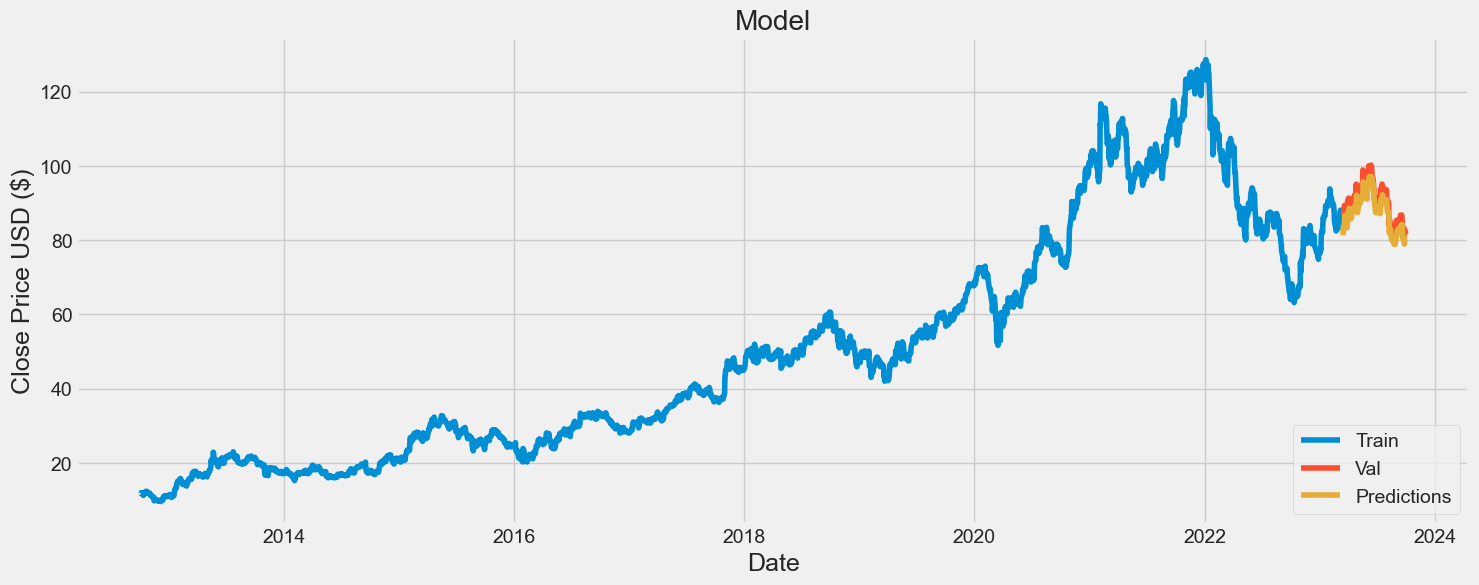

                Close  Predictions
Date                              
2023-03-16  86.389999    81.310822
2023-03-17  86.519997    83.621666
2023-03-20  88.419998    83.873695
2023-03-21  89.370003    85.720383
2023-03-22  87.440002    86.724960
...               ...          ...
2023-09-26  81.300003    80.632050
2023-09-27  82.550003    78.950508
2023-09-28  82.779999    80.034355
2023-09-29  82.410004    80.306145
2023-10-02  81.650002    80.063583

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'SONY'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([4.03449263e-04, 3.21777868e-04, 3.38112672e-04, 2.54809461e-04,
       3.13611780e-04, 1.69872098e-04, 1.74772218e-04, 1.61706010e-04,
       5.06359380e-05, 0.00000000e+00, 1.19238497e-04, 2.43374777e-04,
       1.15970192e-04, 6.69684063e-05, 8.49373633e-05, 1.73140695e-04,
       1.47003605e-05, 3.10351653e-05, 8.16608808e-06, 1.30670553e-04,
       3.13611780e-04, 2.59709582e-04, 6.81125173e-04, 6.23957591e-04,
       6.87660030e-04, 6.50090008e-04, 4.88383998e-04, 6.10888462e-04,
       6.99091793e-04, 6.61524692e-04, 5.70055393e-04, 7.36661815e-04,
       9.13068478e-04, 9.26134686e-04, 8.39565215e-04, 7.84029157e-04,
       8.06896190e-04, 7.87295125e-04, 9.63701787e-04, 1.03883891e-03,
       1.06007384e-03, 1.19074468e-03, 1.07314004e-03, 1.04210488e-03,
       1.07314004e-03, 1.11724200e-03, 1.18257830e-03, 1.29854849e-03,
       1.29528252e-03, 1.02577270e-03, 1.05843939e-03, 1.15480910e-03,
       

2023-10-02 21:23:21.009622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:23:21.182035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:23:21.244421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:23:21.352791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   1/2569 [..............................] - ETA: 56:07 - loss: 0.1667

2023-10-02 21:23:21.480476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2569/2569 [==============================] - 42s 16ms/step - loss: 0.0017
Epoch 2/5
2569/2569 [==============================] - 40s 16ms/step - loss: 5.9304e-04
Epoch 3/5
2569/2569 [==============================] - 40s 15ms/step - loss: 5.1451e-04
Epoch 4/5
2569/2569 [==============================] - 41s 16ms/step - loss: 4.6404e-04
Epoch 5/5
1/5 [=====>........................] - ETA: 1s

2023-10-02 21:26:44.416695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:26:44.485033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:26:44.535085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 21ms/step
RMSE: 7.394894880686298


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/1786629786.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


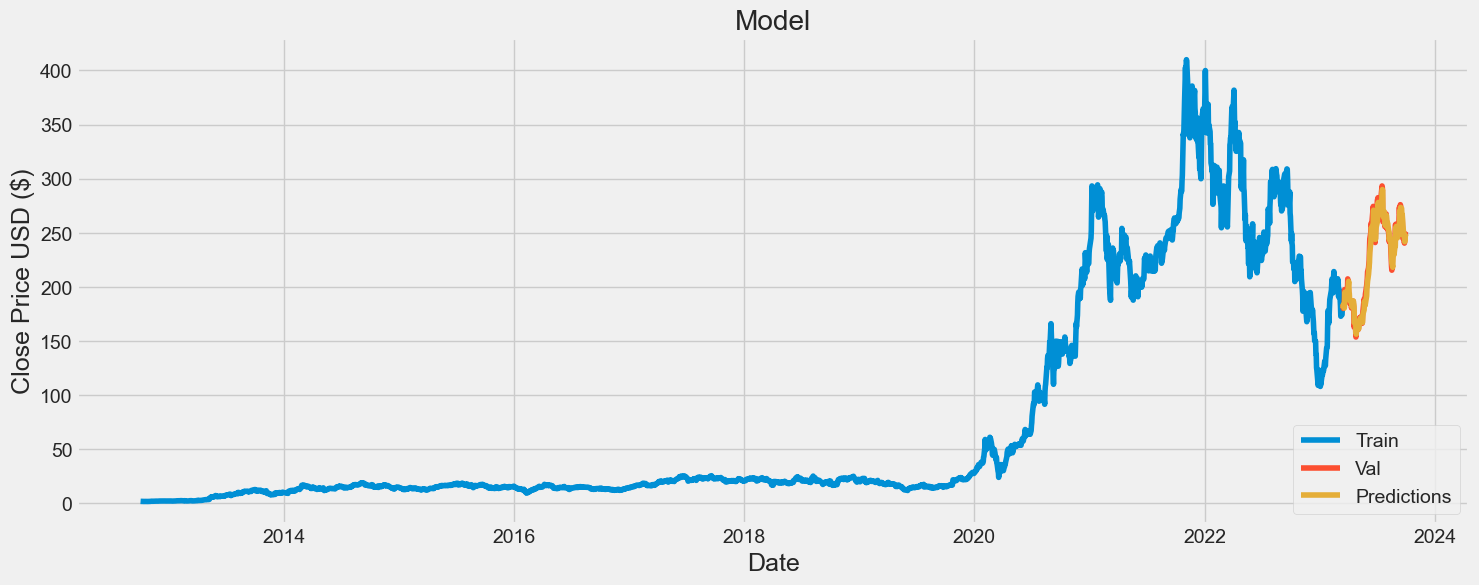

                 Close  Predictions
Date                               
2023-03-16  184.130005   180.272049
2023-03-17  180.130005   183.702362
2023-03-20  183.250000   180.491470
2023-03-21  197.580002   183.279892
2023-03-22  191.149994   195.115479
...                ...          ...
2023-09-26  244.119995   248.753693
2023-09-27  240.500000   245.258316
2023-09-28  246.380005   241.836655
2023-09-29  250.220001   246.384277
2023-10-02  251.600006   249.128220

[138 rows x 2 columns]


/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'TSLA'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')


[*********************100%%**********************]  1 of 1 completed
[array([0.55314309, 0.4607113 , 0.5198511 , 0.5473532 , 0.58271298,
       0.56017369, 0.55355666, 0.55169562, 0.54652605, 0.53039705,
       0.55190236, 0.5403226 , 0.51943752, 0.51654258, 0.52915632,
       0.54652605, 0.57754342, 0.62406948, 0.62241518, 0.60669975,
       0.57464848, 0.57133997, 0.56555   , 0.60980152, 0.58746897,
       0.59884199, 0.60049629, 0.62117454, 0.60049629, 0.60339123,
       0.58457403, 0.58457403, 0.57237386, 0.62675767, 0.65260548,
       0.60897437, 0.60339123, 0.60814722, 0.59367243, 0.58167909,
       0.6075269 , 0.59718777, 0.60318448, 0.60318448, 0.61435068,
       0.60607943, 0.59553348, 0.59739452, 0.58643508, 0.59698095,
       0.59015717, 0.59842842, 0.59098431, 0.61414393, 0.60090986,
       0.57423491, 0.56492968, 0.54776678, 0.52894958, 0.5010339 ])]
[0.5031017684860575]

[array([0.55314309, 0.4607113 , 0.5198511 , 0.5473532 , 0.58271298,
       0.56017369, 0.55355666, 0.5

2023-10-02 21:26:45.961585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:26:46.132582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:26:46.181503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:26:46.302747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/992 [..............................] - ETA: 22:17 - loss: 0.7706

2023-10-02 21:26:46.473297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


992/992 [==============================] - 16s 15ms/step - loss: 0.0046
Epoch 2/5
992/992 [==============================] - 15s 15ms/step - loss: 0.0018
Epoch 3/5
992/992 [==============================] - 120s 121ms/step - loss: 0.0014
Epoch 4/5
992/992 [==============================] - 15s 15ms/step - loss: 0.0012
Epoch 5/5
1/2 [==============>...............] - ETA: 0s

2023-10-02 21:29:47.445119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:29:47.514471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 21:29:47.565442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 70ms/step
RMSE: 0.9342750839772302


/var/folders/gl/7b3249ls717gnpvsm2cf0ks80000gn/T/ipykernel_15264/1350199591.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


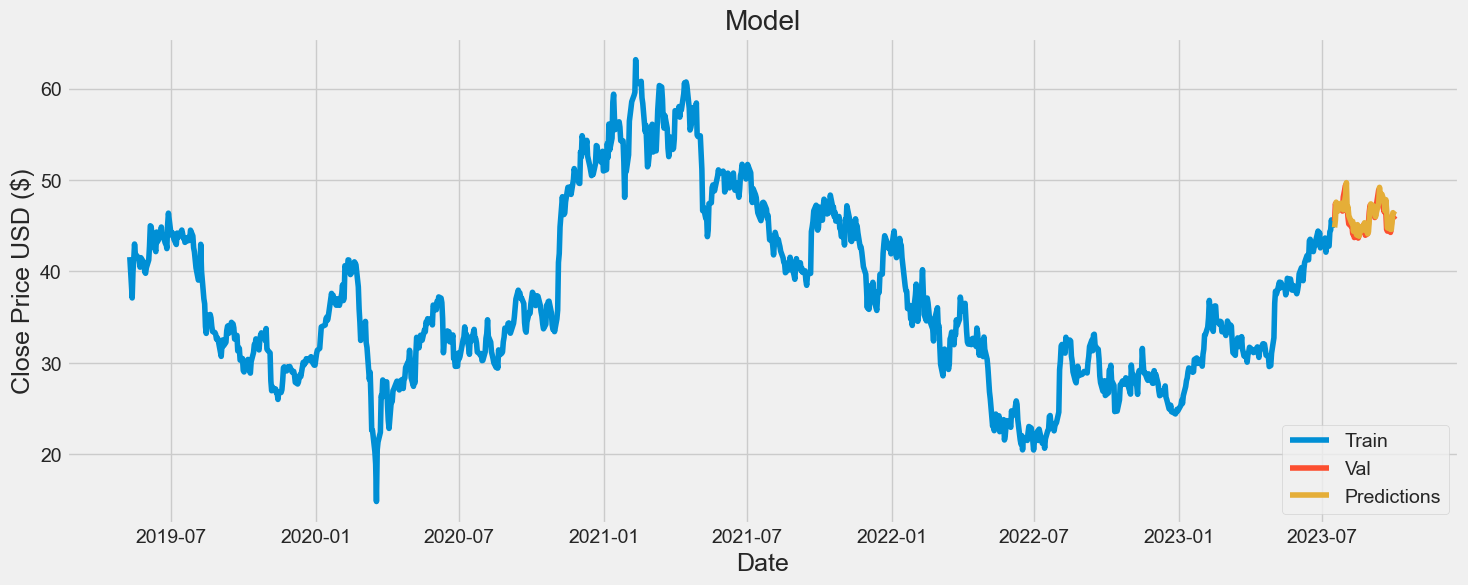

                Close  Predictions
Date                              
2023-07-17  45.509998    44.817673
2023-07-18  47.410000    45.583801
2023-07-19  47.119999    47.583755
2023-07-20  46.570000    47.217876
2023-07-21  47.230000    46.590725
2023-07-24  47.320000    47.327961
2023-07-25  47.169998    47.458088
2023-07-26  47.310001    47.295685
2023-07-27  46.610001    47.455589
2023-07-28  48.139999    46.746063
2023-07-31  49.459999    48.369205
2023-08-01  46.650002    49.719990
2023-08-02  46.959999    46.655342
2023-08-03  45.910000    47.066242
2023-08-04  45.200001    46.113327
2023-08-07  44.950001    45.437363
2023-08-08  45.160000    45.239101
2023-08-09  44.110001    45.477314
2023-08-10  44.599998    44.389412
2023-08-11  43.709999    44.872974
2023-08-14  44.849998    43.984913
2023-08-15  44.080002    45.120964
2023-08-16  43.650002    44.338875
2023-08-17  43.970001    43.855846
2023-08-18  44.689999    44.202320
2023-08-21  44.630001    44.947659
2023-08-22  44.34999

/Applications/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker_symbol = 'UBER'
# Define starting and ending date interval for stock data download.
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

# Get the stock quote
df = pdr.get_data_yahoo(ticker_symbol, start, end)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)

model.save(f'./models/{ticker_symbol}_model.h5')
